In [1]:
import os
import numpy as np
import pandas as pd
from scipy.stats import hypergeom
from statsmodels.stats.multitest import multipletests
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

In [2]:
def read_txt_files(folder_path):
    temp_frames = {}
    data_frames = {}
        
    # Check if the folder exists
    if not os.path.exists(folder_path):
        print(f"Folder '{folder_path}' not found.")
        return
    
    # Loop through all files in the folder with the .txt extension
    for filename in os.listdir(folder_path): 
        if filename.endswith(".txt"):
            file_path = os.path.join(folder_path, filename)

            # Read the tab-delimited file into a pandas DataFrame
            try:
                temp_frames[filename] = pd.read_csv(file_path, sep='\t')
                
                #Normalize clonecounts
                temp_frames[filename]['cloneFraction'] = temp_frames[filename]['cloneFraction'] / np.sum(temp_frames[filename]['cloneFraction'])


            except Exception as e:
                print(f"Error reading file '{filename}': {e}")

    for filename in temp_frames:
    # Extract sample ID from the filename
        sample_id = filename[:-4]
        print(sample_id)

        data_frames[sample_id] = temp_frames[filename]

    return data_frames

In [63]:
# Specify the folder path
folder_path = '../annotated'

# Read the files and get the dictionary of DataFrames
result_dict = read_txt_files(folder_path)

[print(key,':',str(len(x))) for key,x in result_dict.items()]

BV181D3_0CD8
BV051D2_28CD8
BV123D4_28CD8
BV104D4_0CD4
BV137D3_0CD8
BV092D4_28CD8
BV088D0CD4
BV182D2_28CD4
BV181D0CD4
BV152D4_0CD8
BV069D3_0CD4
BV092D4_0CD8
BV104D4_28CD8
BV182D3_0CD4
BV051D4_28CD8
BV123D2_28CD8
BV123D3_0CD8
BV092D2_28CD8
BV051D4_0CD4
BV088D3_28CD8
BV181D3_28CD4
BV069D3_28CD8
BV152D3_28CD4
BV123D0CD8
BV137D3_28CD4
BV104D0CD4
BV104D2_28CD8
BV182D4_28CD4
BV069D0CD8
BV088D4_0CD4
BV152D0CD8
BV152D4_28CD4
BV092D0CD4
BV069D4_28CD8
BV123D4_0CD8
BV181D4_28CD4
BV051D3_0CD4
BV137D0CD4
BV088D4_28CD8
BV051D3_28CD8
BV182D0CD8
BV182D3_28CD4
BV051D0CD8
BV137D4_28CD4
BV088D3_0CD4
BV092D3_28CD8
BV181D4_0CD8
BV088D2_28CD8
BV123D3_28CD8
BV152D2_28CD4
BV137D4_0CD8
BV181D2_28CD4
BV069D2_28CD8
BV104D3_0CD4
BV152D3_0CD8
BV104D3_28CD8
BV137D2_28CD4
BV069D4_0CD4
BV182D4_0CD4
BV092D3_0CD8
BV152D3_0CD4
BV104D3_28CD4
BV137D2_28CD8
BV069D4_0CD8
BV182D4_0CD8
BV092D3_0CD4
BV092D3_28CD4
BV181D4_0CD4
BV088D2_28CD4
BV123D3_28CD4
BV152D2_28CD8
BV137D4_0CD4
BV181D2_28CD8
BV069D2_28CD4
BV104D3_0CD8
BV182D0

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [4]:
database_location="../../../../imdb/"
epirepofile = database_location+"EpiRepo.txt"

epirepo = pd.read_csv(epirepofile,sep="\t")
epirepo

epitope                 mhc             origin  \
0        AAGIGILTV          HLA-A*0201       Homo sapiens   
1        AAKMYAFTL          HLA-B*0801       Homo sapiens   
2        AALQRLAAV          HLA-B*0801       Homo sapiens   
3       AALQRLAAVL          HLA-B*0801       Homo sapiens   
4        ADRGLLRDI          HLA-B*0801  Influenza A virus   
...            ...                 ...                ...   
1742     YYQLYSTQL  Unknown,HLA-A*2402         SARS-CoV-2   
1743  YYRARAGEAANF             Unknown         SARS-CoV-2   
1744    YYRRATRRIR             Unknown         SARS-CoV-2   
1745     YYRYNLPTM          HLA-A*2402         SARS-CoV-2   
1746     YYTSNPTTF          HLA-A*2402         SARS-CoV-2   

                                                protein  
0      Melanoma antigen recognized by T-cells 1 (MART1)  
1                             Zinc transporter 8 (ZNT8)  
2     Receptor-type tyrosine-protein phosphatase-lik...  
3     Receptor-type tyrosine-protein phosphatase-lik...  
4                                    Nucleoprotein (NP)  
...                                                 ...  
1742                                              ORF3a  
1743                                             ORF1ab  
1744                           Nucleocapsid protein (N)  
1745                                             ORF1ab  
1746                                             ORF1ab  

[1747 rows x 4 columns]

In [5]:
sarscov2epitopes = list(epirepo.loc[epirepo['origin'] == "SARS-CoV-2"]["epitope"])
#print(sarscov2epitopes)

spike = list(epirepo.loc[(epirepo['origin'] == "SARS-CoV-2") & (epirepo['protein'] == "Spike/surface glycoprotein (S)")]["epitope"])
#print(spike)

In [81]:
cov_results = dict()
for sample,df in result_dict.items():
    cov_results[sample] = df.loc[(df["Epitope"].isin(sarscov2epitopes)) & (df["Score"] > 0.23)]

In [51]:
cov_results["BV088D0CD8"]

v_call      junction_aa   j_call  cloneCount  cloneFraction    Epitope  \
31    TRAV19   CALSEADFGNVLHC   TRAJ35         3.0       0.000018  NQKLIANQF   
34  TRAV13-2  CAENSWMDSSYKLIF   TRAJ12         2.0       0.000012  SIIAYTMSL   
82  TRAV12-1  CVVNMRMDSNYQLIW   TRAJ33         5.0       0.000030  NYNYLYRLF   
89  TRAV13-2  CAENSWVDSSYKLIF   TRAJ12         1.0       0.000006  SIIAYTMSL   
90  TRBV20-1  CSARDQPASTDTQYF  TRBJ2-3        11.0       0.000058  HLMSFPQSA   

       Score  
31  0.355481  
34  0.355056  
82  0.237892  
89  0.236704  
90  0.236704

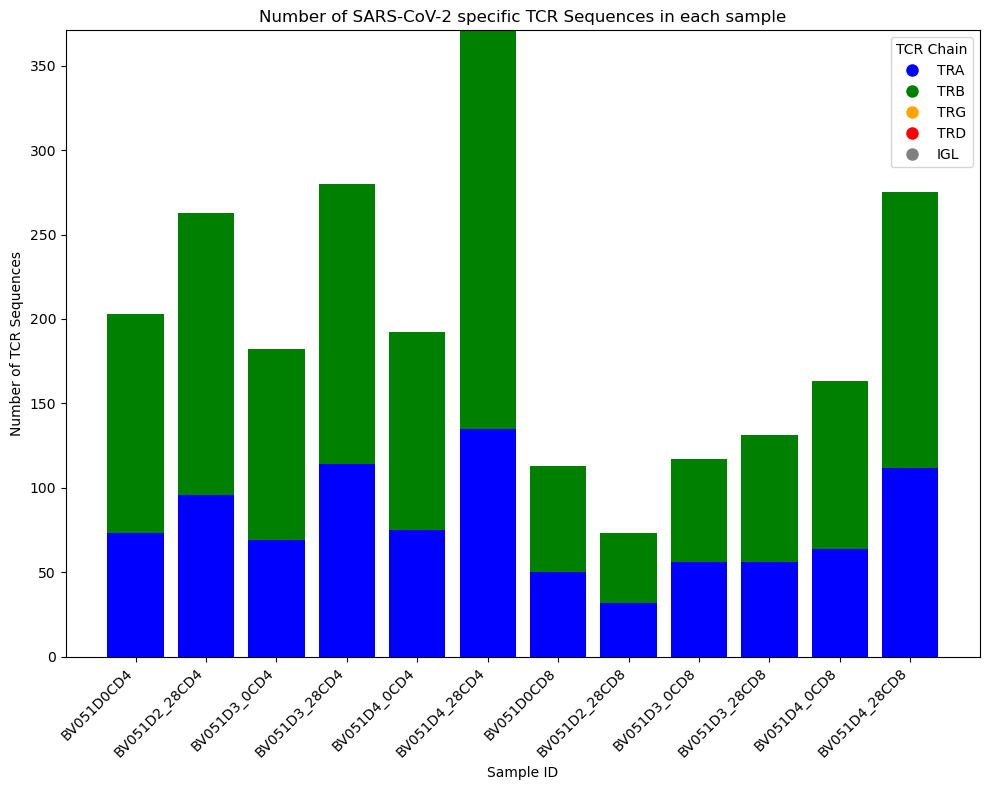

In [8]:
def plot_row_counts(data_frames):
    # Create a bar graph showing the number of rows for each DataFrame
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # Extract TCR sequences count and file names
    sample_ids = list(data_frames.keys())
    row_counts = [len(df) for df in data_frames.values()]

    # Sort sample IDs based on CD4 and CD8
    sorted_sample_ids_cd4 = sorted([id for id in sample_ids if id.endswith('CD4')])
    sorted_sample_ids_cd8 = sorted([id for id in sample_ids if id.endswith('CD8')])
    sorted_sample_ids = sorted_sample_ids_cd4 + sorted_sample_ids_cd8

    # Extract all unique TCR chains across all samples
    #all_tcr_chains = set(chain for df in data_frames.values() for chain in df['v_call'].str[:3].unique())

    # Create a color map for TCR chains
    tcr_colors = {'TRA': 'blue', 'TRB': 'green', 'TRG': 'orange', 'TRD': 'red','IGL':'grey'}

    # Initialize bottom values for stacking
    bottom = [0] * len(sorted_sample_ids)

    # Plotting for all samples
    for sample_id in sorted_sample_ids:
        tcr_chains = set(data_frames[sample_id]['v_call'].str[:3].unique())
        for chain in tcr_colors.keys():
            count = len(data_frames[sample_id][data_frames[sample_id]['v_call'].str[:3] == chain])
            ax.bar(sample_id, count, color=tcr_colors[chain], bottom=bottom[sorted_sample_ids.index(sample_id)])
            bottom[sorted_sample_ids.index(sample_id)] += count

    # Set x-tick positions and labels
    ax.set_xticks(range(len(sorted_sample_ids)))
    ax.set_xticklabels(sorted_sample_ids, rotation=45, ha='right')

    ax.set_xlabel('Sample ID')
    ax.set_ylabel('Number of TCR Sequences')
    ax.set_title('Number of SARS-CoV-2 specific TCR Sequences in each sample')

    # Add legend for TCR chains
    legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=tcr_colors[tc], markersize=10, label=tc) for tc in tcr_colors.keys()]
    ax.legend(handles=legend_elements, title='TCR Chain')

    # Show the plot
    plt.tight_layout()
    plt.show()
    
plot_row_counts({key: value for key, value in cov_results.items() if 'BV051' in key})

In [8]:
samples = set([x[0:5] for x in cov_results.keys()])

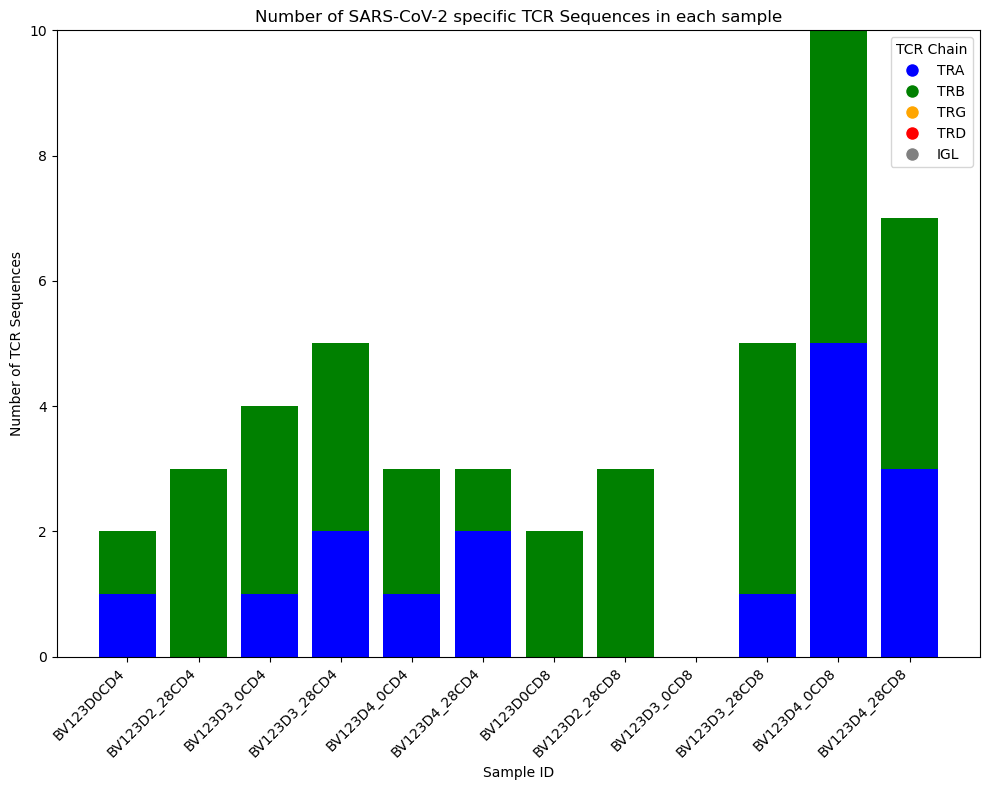

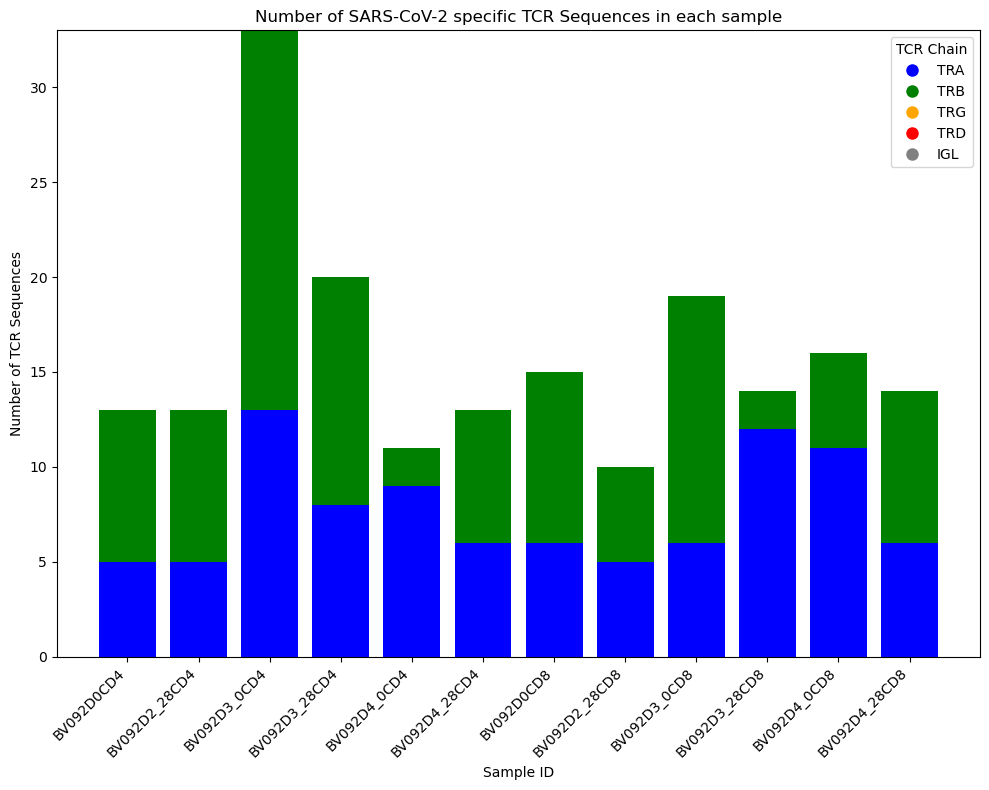

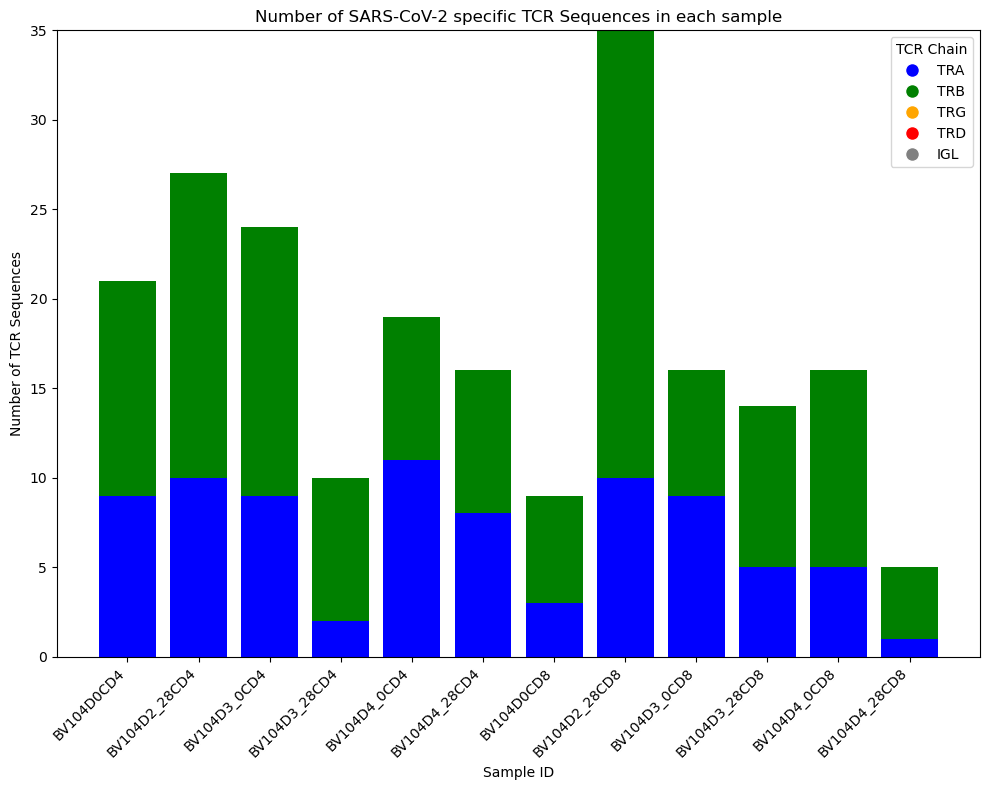

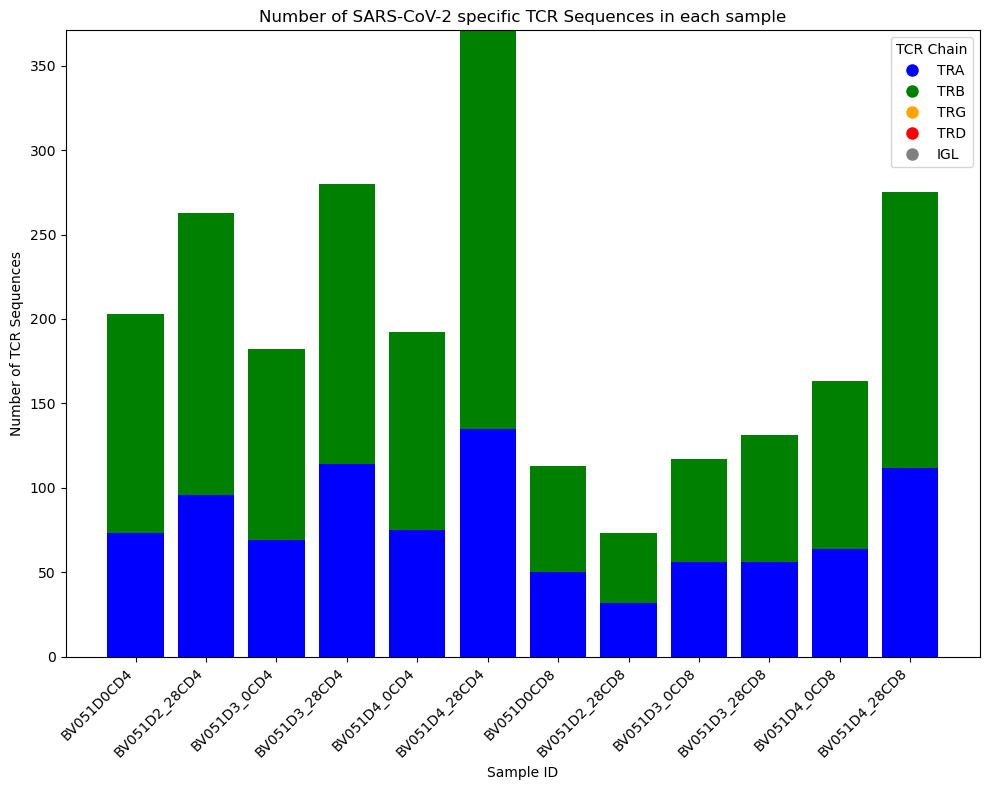

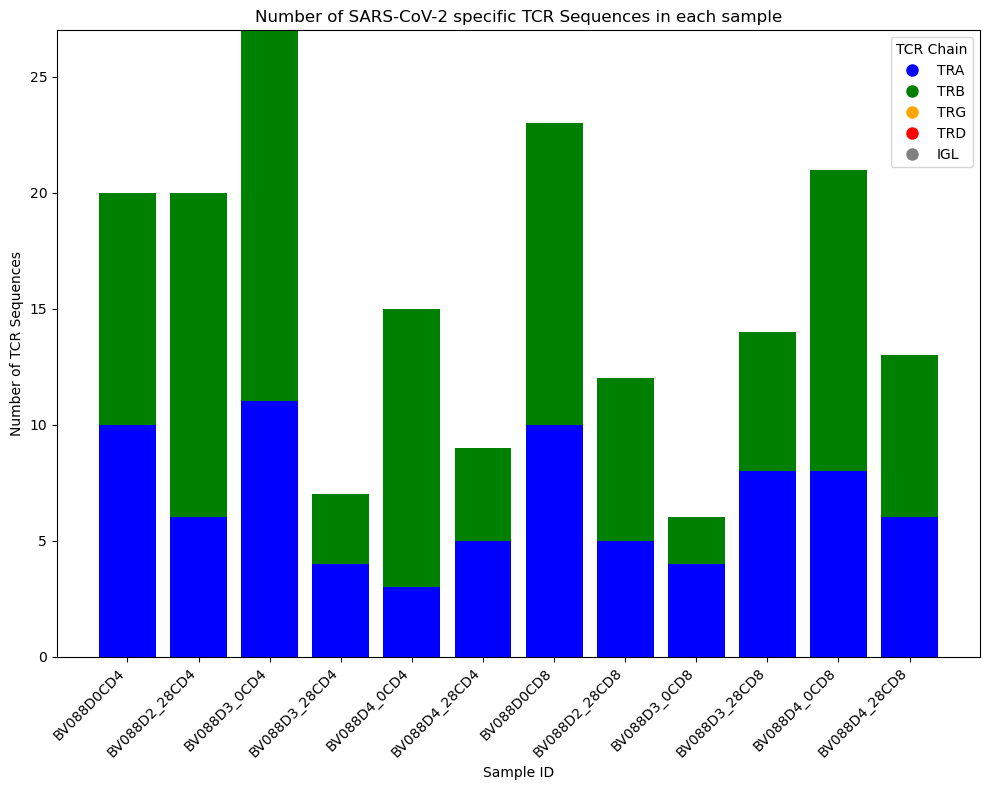

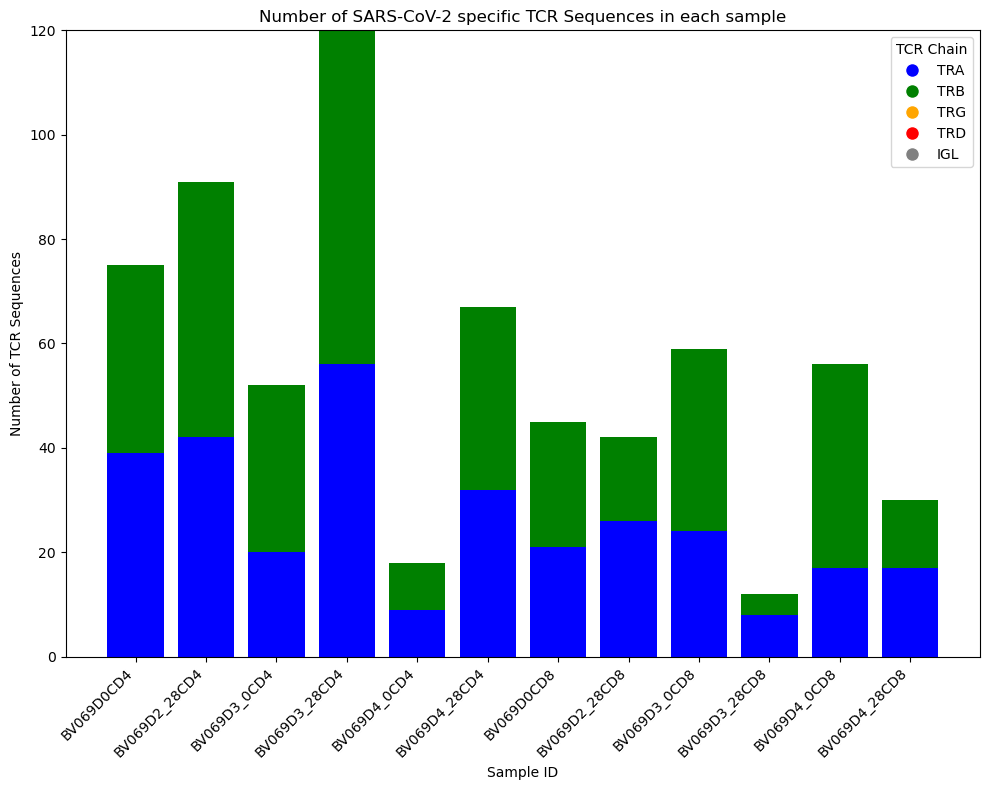

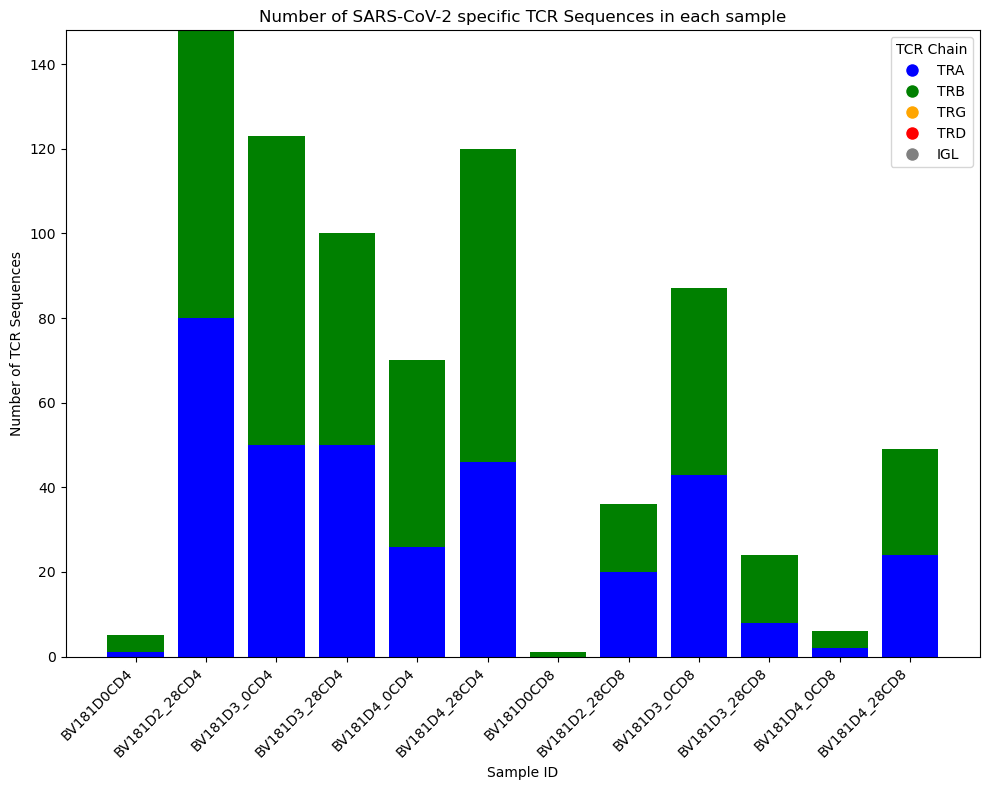

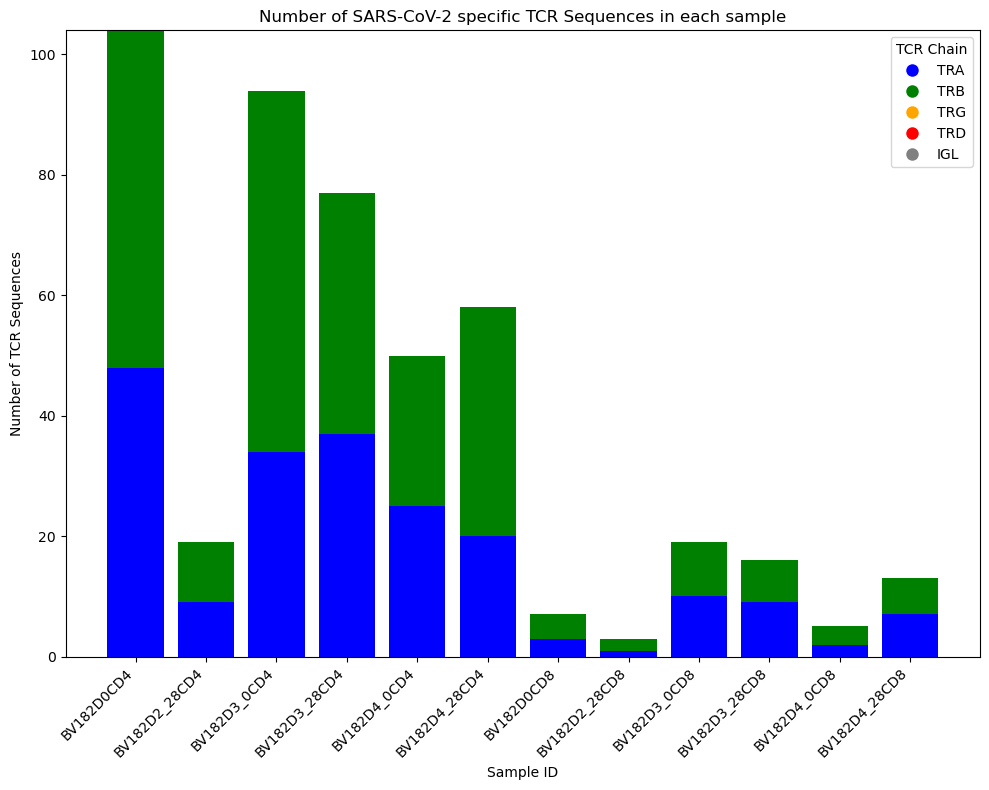

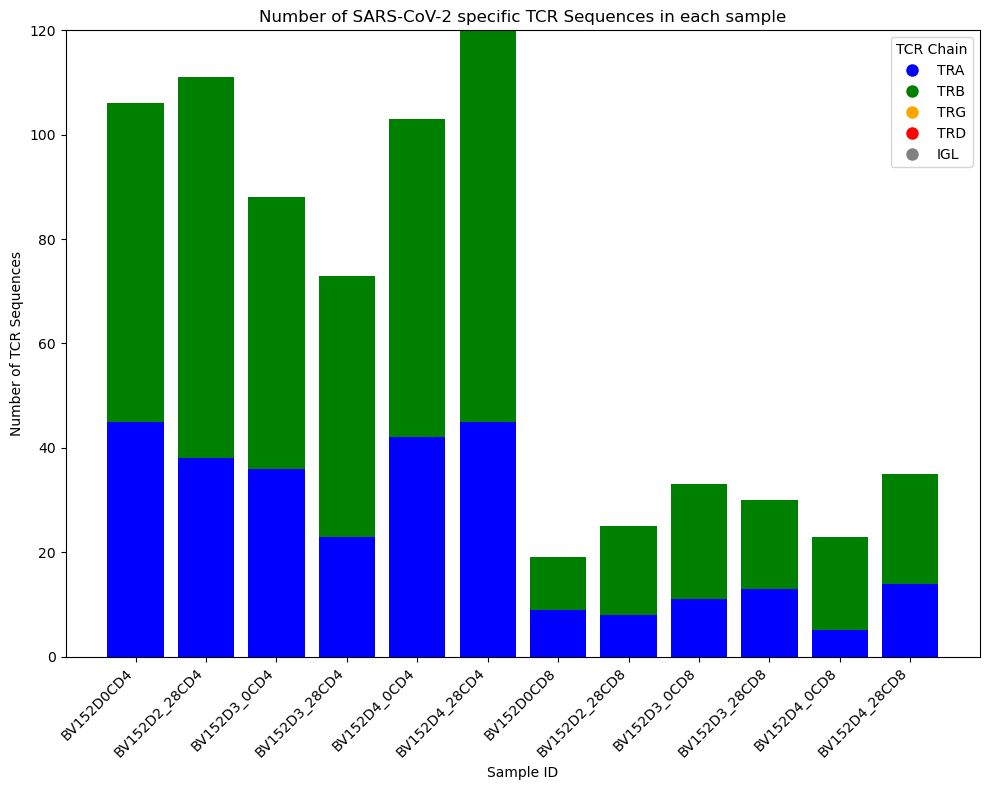

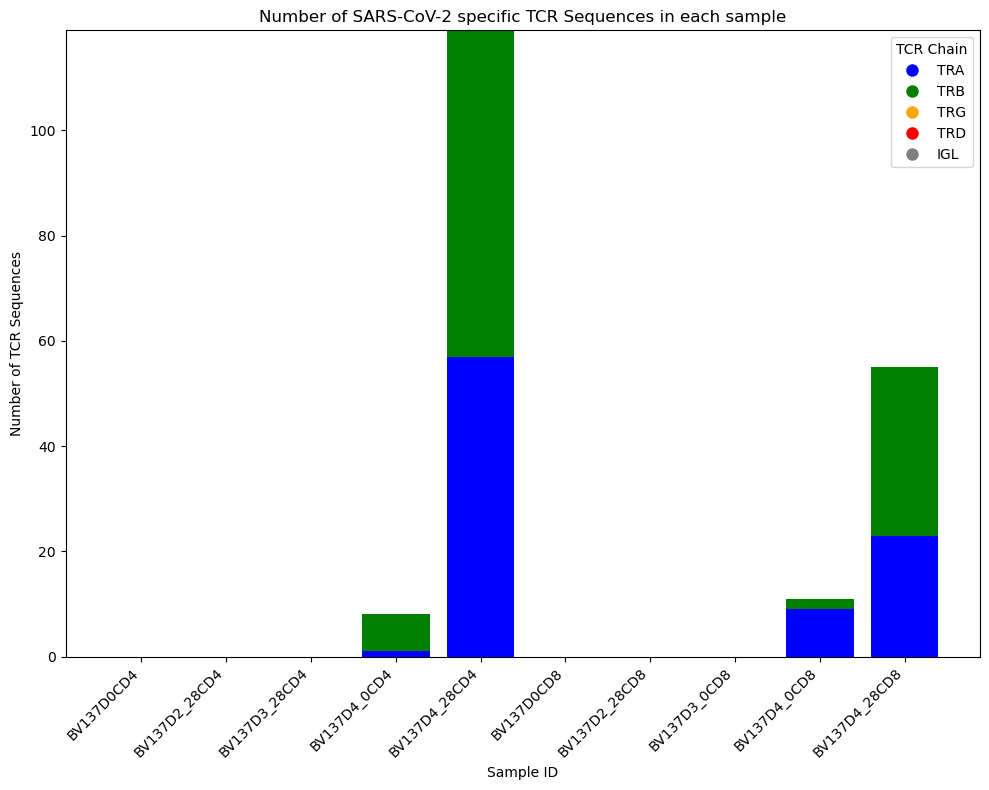

In [10]:
for sample in samples:
    plot_row_counts({key: value for key, value in cov_results.items() if sample in key})

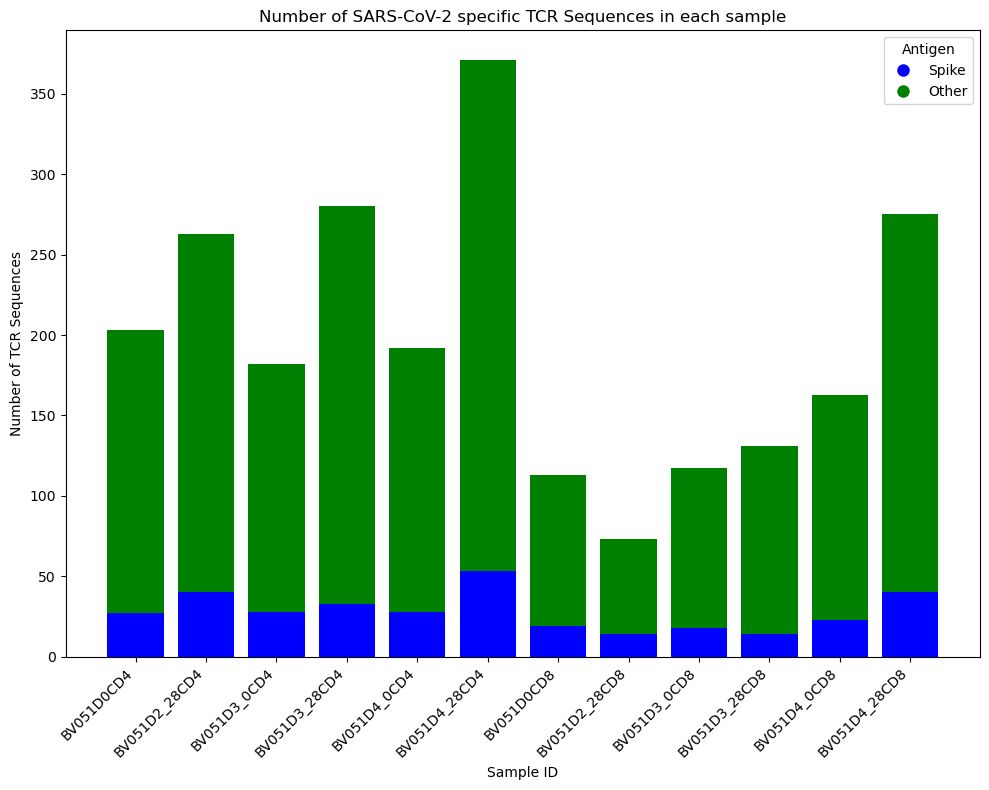

In [11]:
def plot_spike(data_frames):
    # Create a bar graph showing the number of rows for each DataFrame
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # Extract TCR sequences count and file names
    sample_ids = list(data_frames.keys())
    row_counts = [len(df) for df in data_frames.values()]

    # Sort sample IDs based on CD4 and CD8
    sorted_sample_ids_cd4 = sorted([id for id in sample_ids if id.endswith('CD4')])
    sorted_sample_ids_cd8 = sorted([id for id in sample_ids if id.endswith('CD8')])
    sorted_sample_ids = sorted_sample_ids_cd4 + sorted_sample_ids_cd8

    # Extract all unique TCR chains across all samples
    all_tcr_chains = set(chain for df in data_frames.values() for chain in df['v_call'].str[:3].unique())

    # Create a color map for TCR chains
    tcr_colors = {'Spike': 'blue', 'Other': 'green'}

    # Initialize bottom values for stacking
    bottom = [0] * len(sorted_sample_ids)

    # Plotting for all samples
    for sample_id in sorted_sample_ids:

        #Spike
        count = len(data_frames[sample_id][data_frames[sample_id]['Epitope'].isin(spike)])
        ax.bar(sample_id, count, color='blue', bottom=bottom[sorted_sample_ids.index(sample_id)])
        bottom[sorted_sample_ids.index(sample_id)] += count
        
        #Other
        count = len(data_frames[sample_id][~data_frames[sample_id]['Epitope'].isin(spike)])
        ax.bar(sample_id, count, color='green', bottom=bottom[sorted_sample_ids.index(sample_id)])
        bottom[sorted_sample_ids.index(sample_id)] += count

    # Set x-tick positions and labels
    ax.set_xticks(range(len(sorted_sample_ids)))
    ax.set_xticklabels(sorted_sample_ids, rotation=45, ha='right')

    ax.set_xlabel('Sample ID')
    ax.set_ylabel('Number of TCR Sequences')
    ax.set_title('Number of SARS-CoV-2 specific TCR Sequences in each sample')

    # Add legend for TCR chains
    legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=tcr_colors[tc], markersize=10, label=tc) for tc in tcr_colors.keys()]
    ax.legend(handles=legend_elements, title='Antigen')

    # Show the plot
    plt.tight_layout()
    plt.show()
    
plot_spike({key: value for key, value in cov_results.items() if 'BV051' in key})

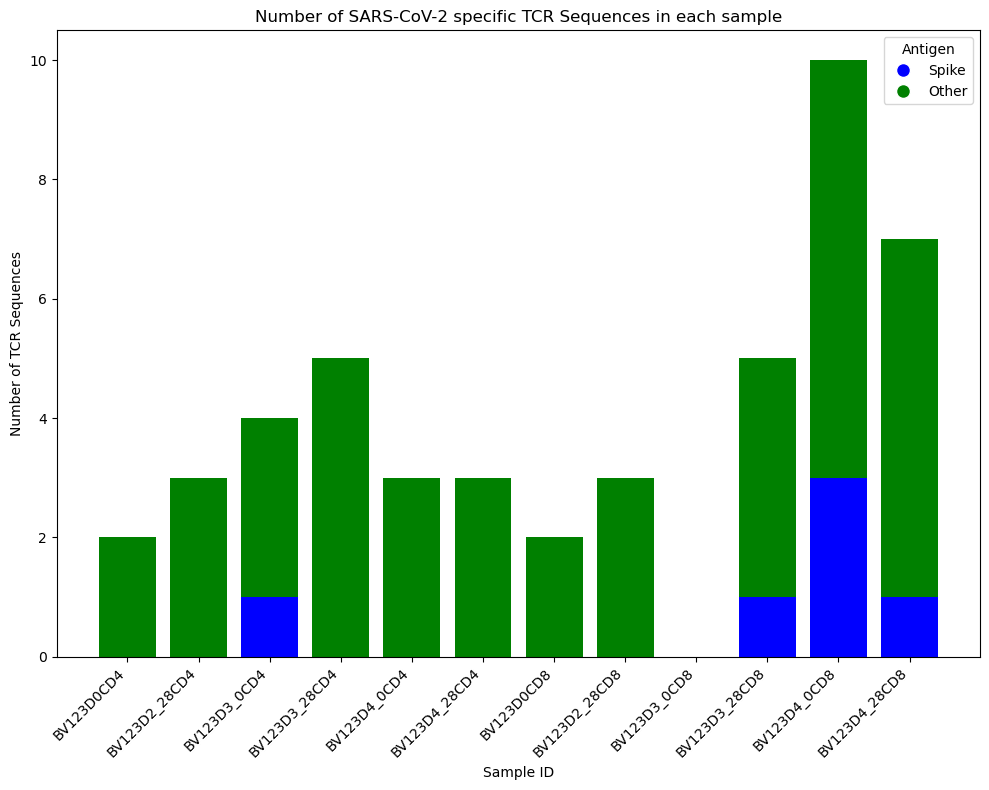

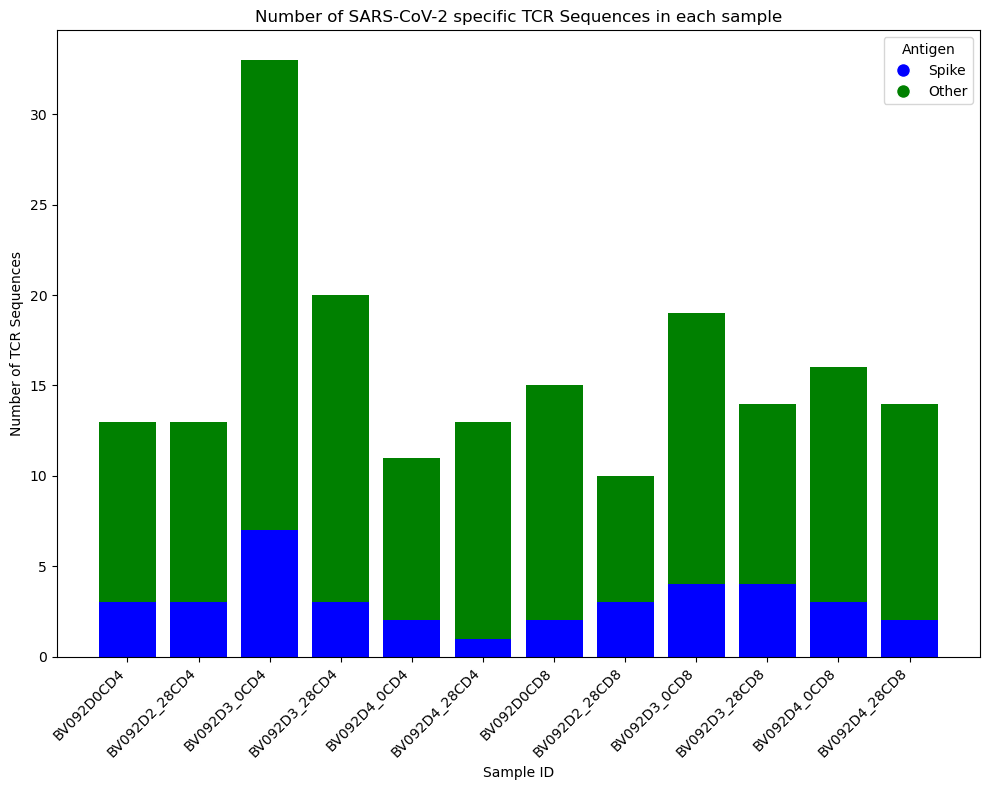

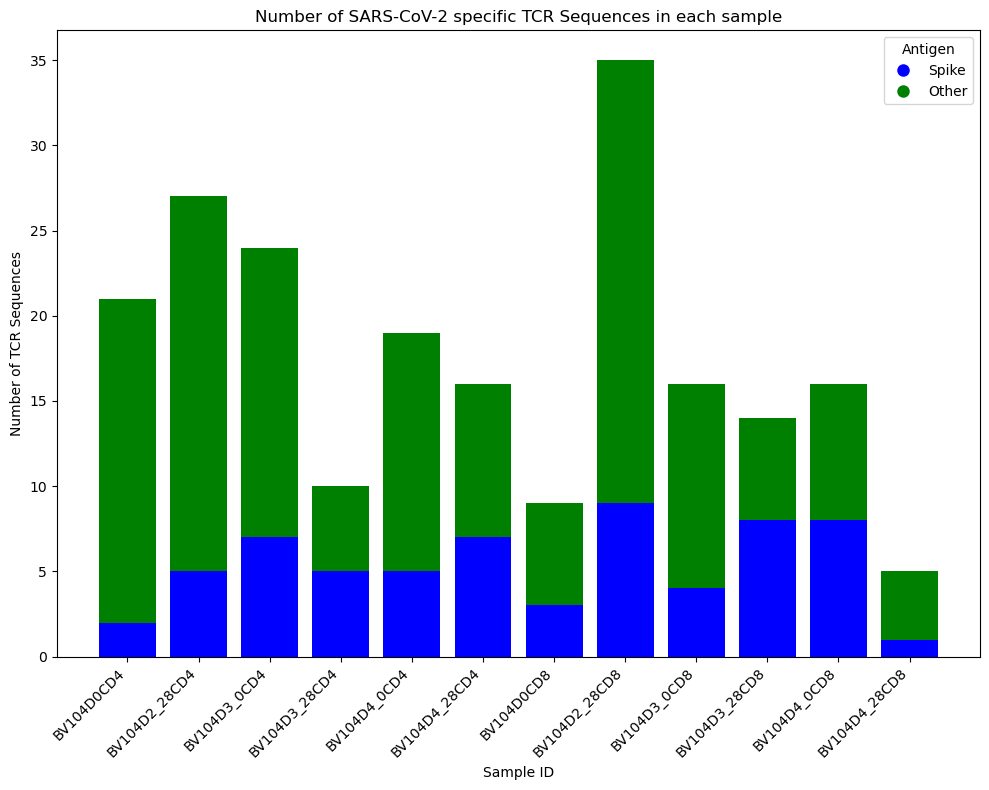

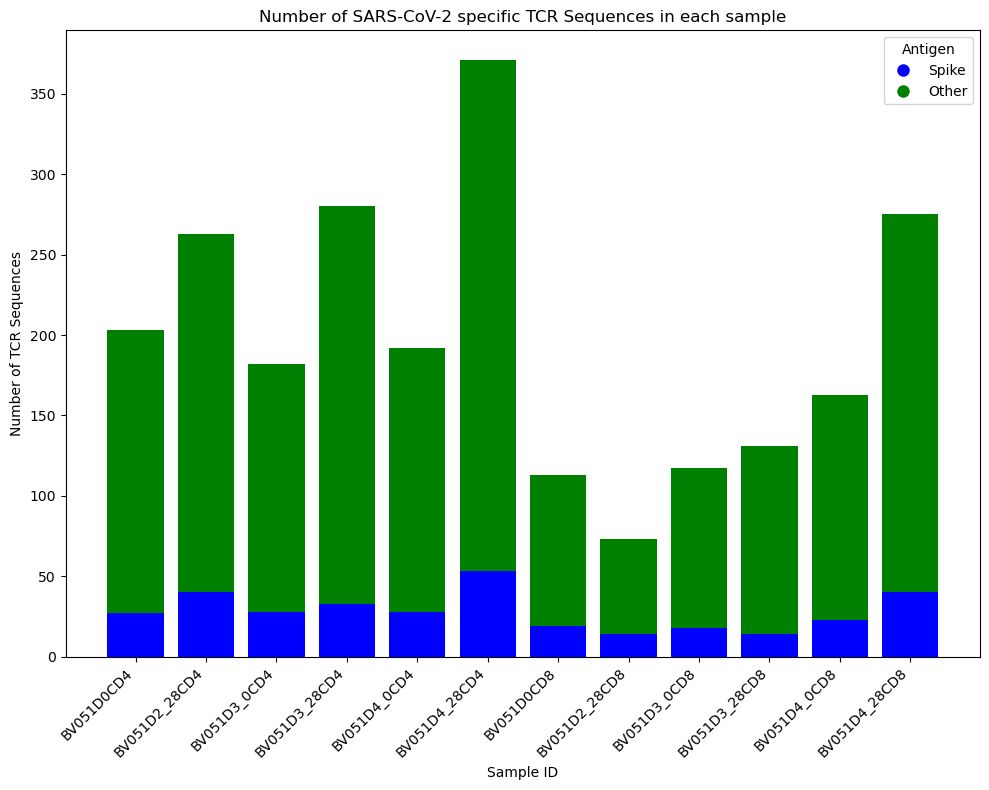

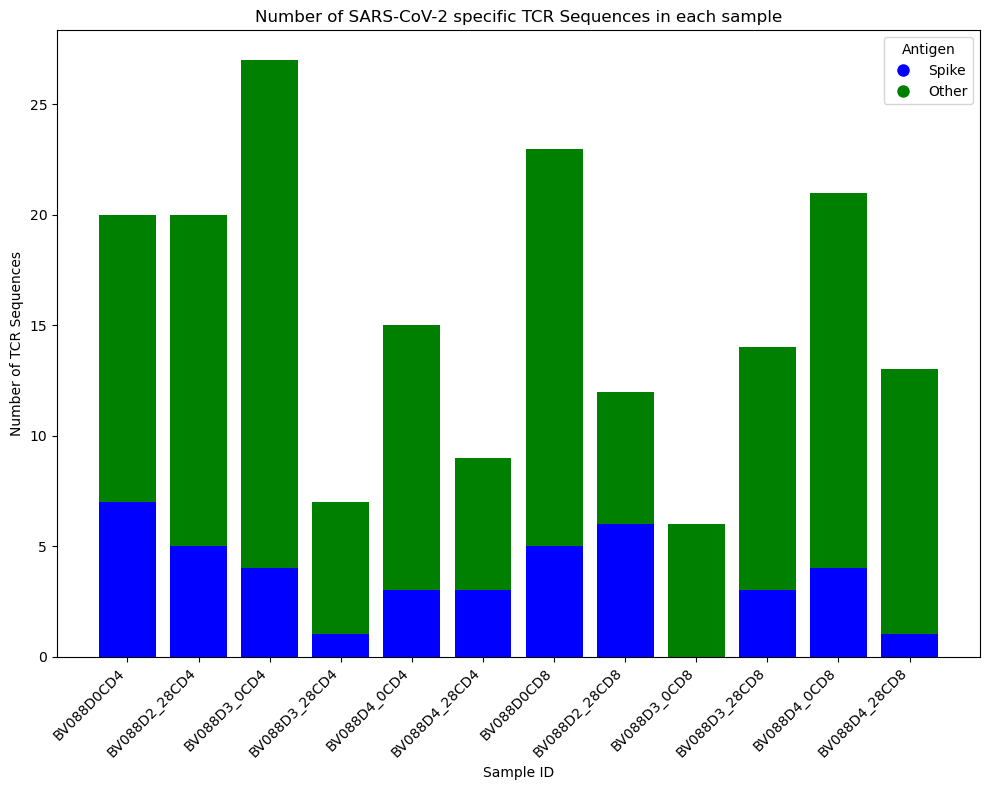

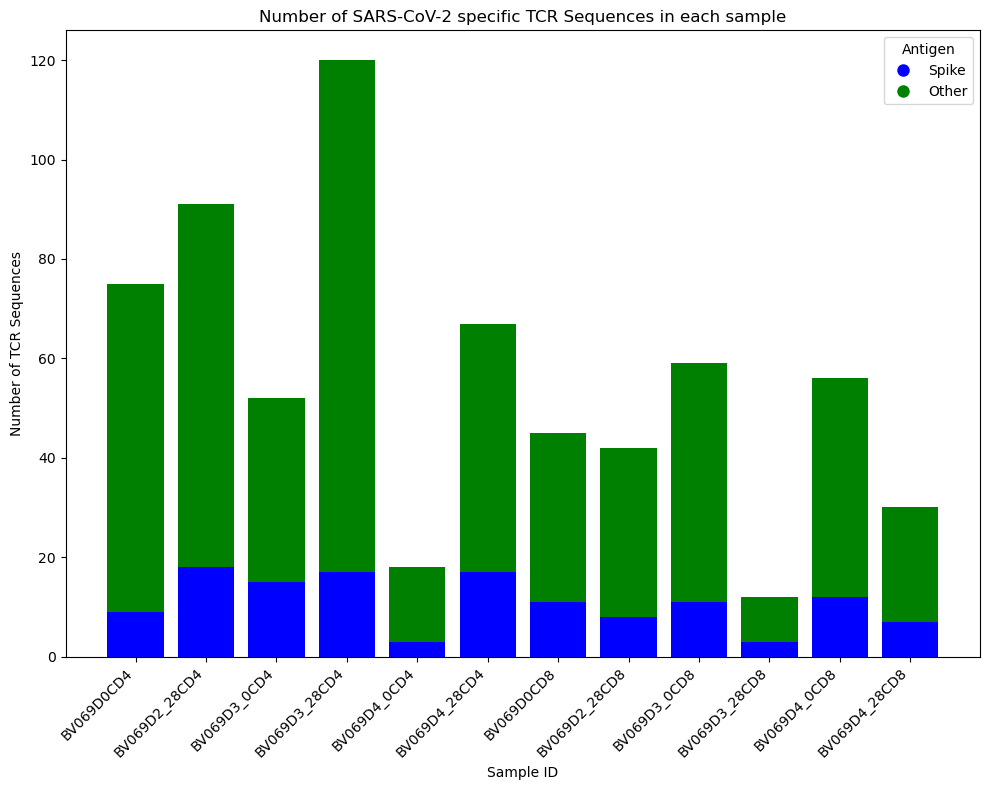

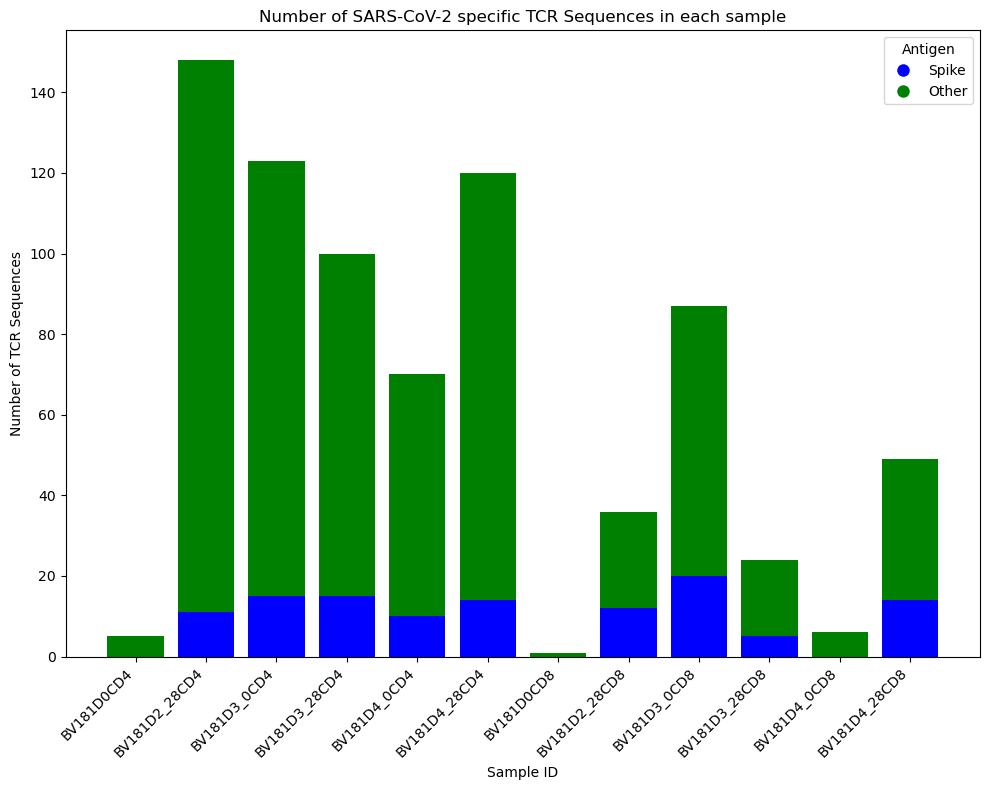

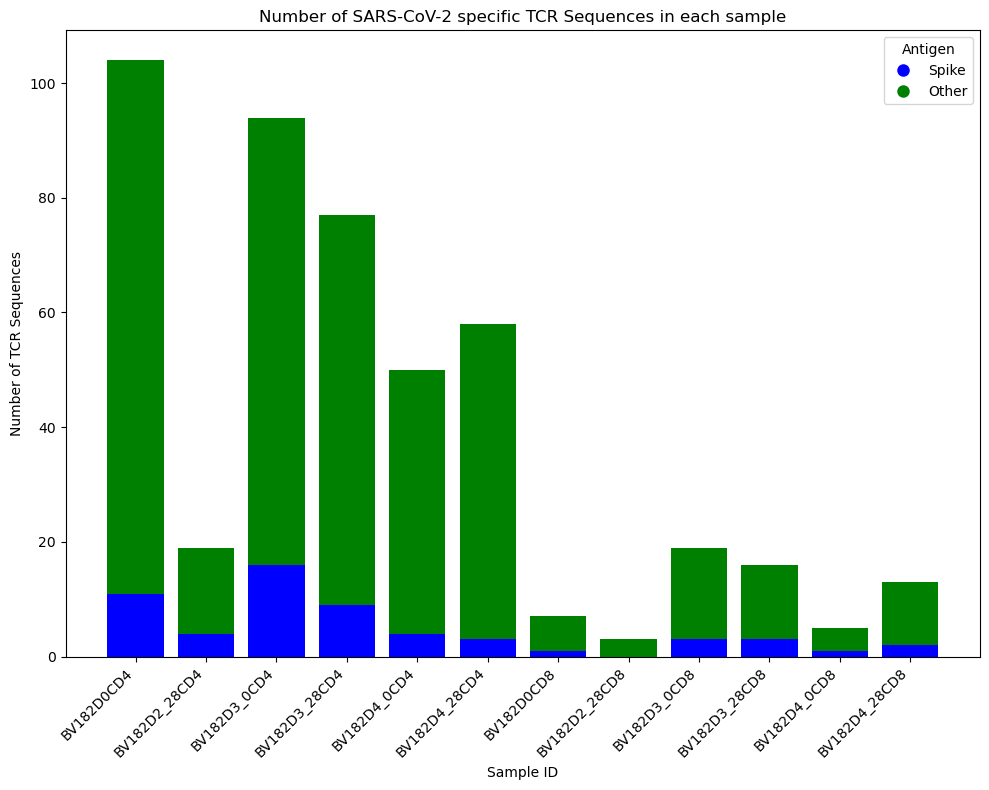

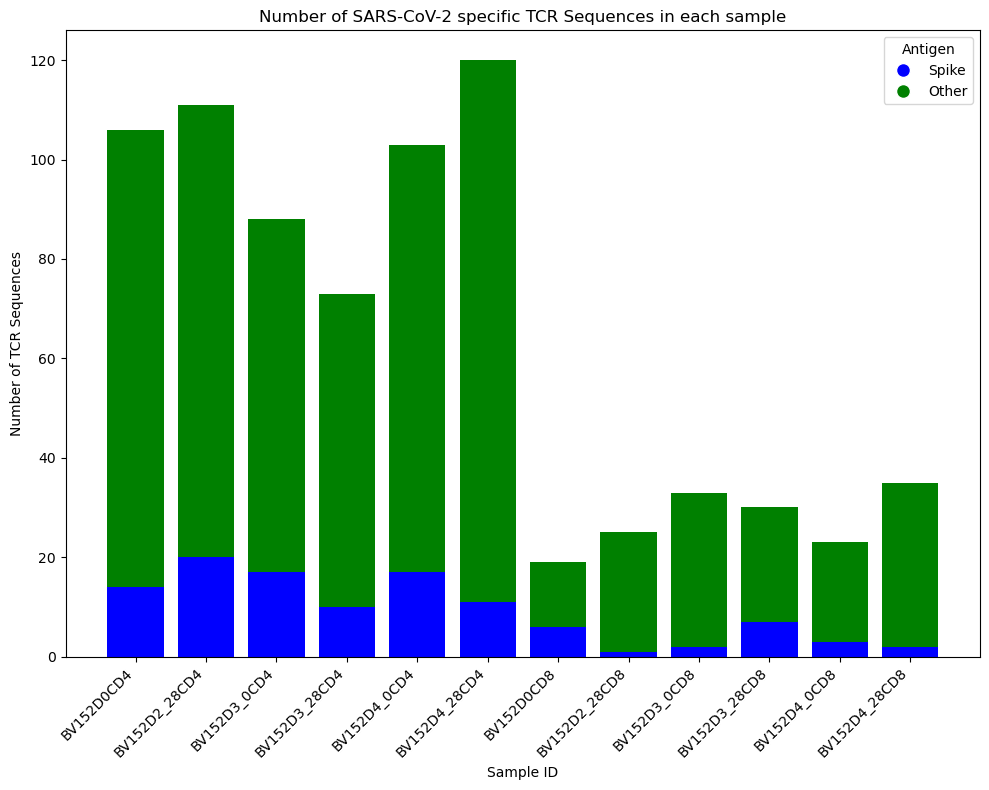

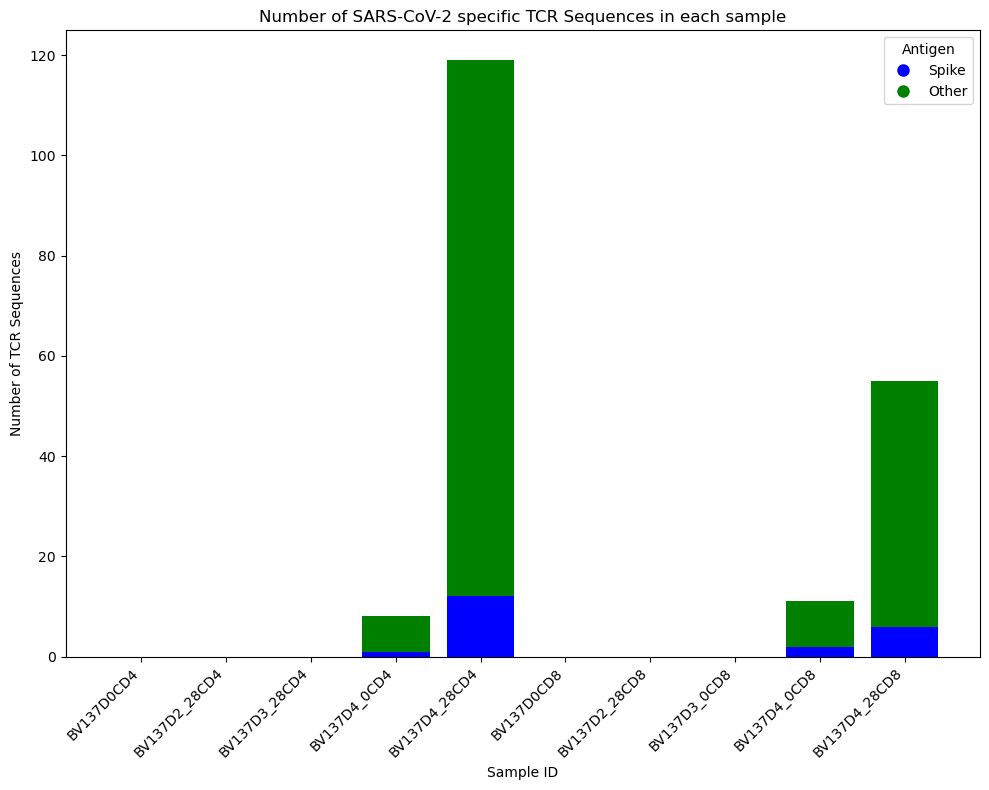

In [12]:
for sample in samples:
    plot_spike({key: value for key, value in cov_results.items() if sample in key})

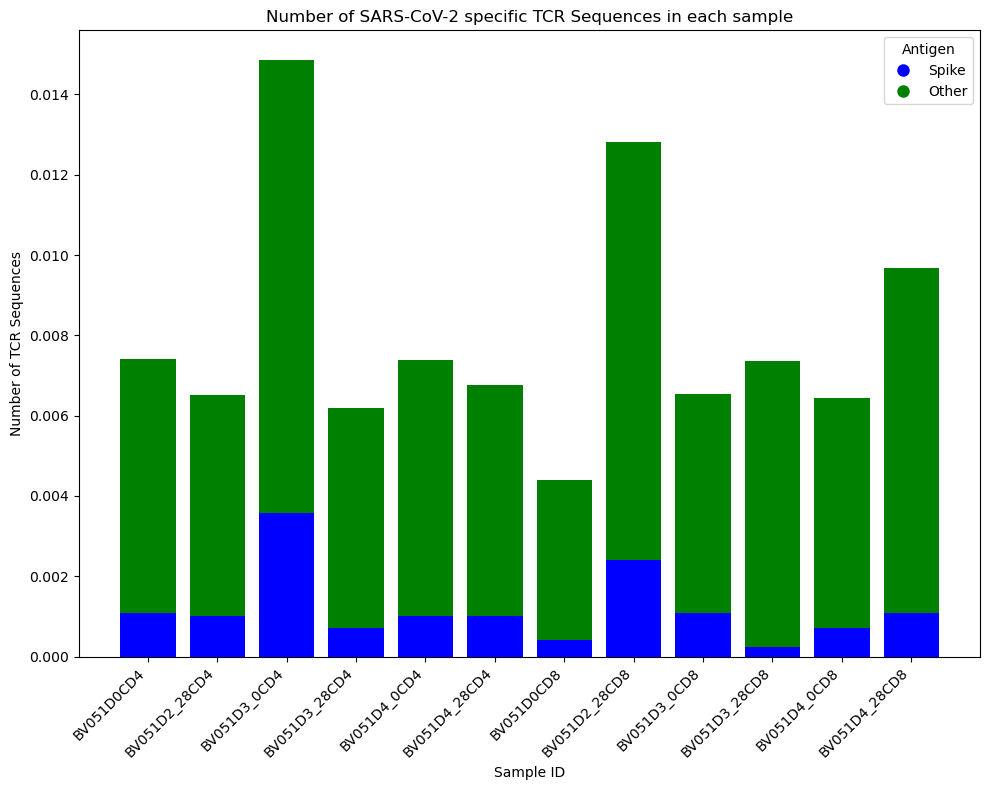

In [13]:
def plot_spike(data_frames):
    # Create a bar graph showing the number of rows for each DataFrame
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # Extract TCR sequences count and file names
    sample_ids = list(data_frames.keys())
    row_counts = [len(df) for df in data_frames.values()]

    # Sort sample IDs based on CD4 and CD8
    sorted_sample_ids_cd4 = sorted([id for id in sample_ids if id.endswith('CD4')])
    sorted_sample_ids_cd8 = sorted([id for id in sample_ids if id.endswith('CD8')])
    sorted_sample_ids = sorted_sample_ids_cd4 + sorted_sample_ids_cd8

    # Extract all unique TCR chains across all samples
    all_tcr_chains = set(chain for df in data_frames.values() for chain in df['v_call'].str[:3].unique())

    # Create a color map for TCR chains
    tcr_colors = {'Spike': 'blue', 'Other': 'green'}

    # Initialize bottom values for stacking
    bottom = [0] * len(sorted_sample_ids)

    # Plotting for all samples
    for sample_id in sorted_sample_ids:

        #Spike
        count = np.sum(data_frames[sample_id][data_frames[sample_id]['Epitope'].isin(spike)]["cloneFraction"])
        ax.bar(sample_id, count, color='blue', bottom=bottom[sorted_sample_ids.index(sample_id)])
        bottom[sorted_sample_ids.index(sample_id)] += count
        
        #Other
        count = np.sum(data_frames[sample_id][~data_frames[sample_id]['Epitope'].isin(spike)]["cloneFraction"])
        ax.bar(sample_id, count, color='green', bottom=bottom[sorted_sample_ids.index(sample_id)])
        bottom[sorted_sample_ids.index(sample_id)] += count

    # Set x-tick positions and labels
    ax.set_xticks(range(len(sorted_sample_ids)))
    ax.set_xticklabels(sorted_sample_ids, rotation=45, ha='right')

    ax.set_xlabel('Sample ID')
    ax.set_ylabel('Number of TCR Sequences')
    ax.set_title('Number of SARS-CoV-2 specific TCR Sequences in each sample')

    # Add legend for TCR chains
    legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=tcr_colors[tc], markersize=10, label=tc) for tc in tcr_colors.keys()]
    ax.legend(handles=legend_elements, title='Antigen')

    # Show the plot
    plt.tight_layout()
    plt.show()
    
plot_spike({key: value for key, value in cov_results.items() if 'BV051' in key})

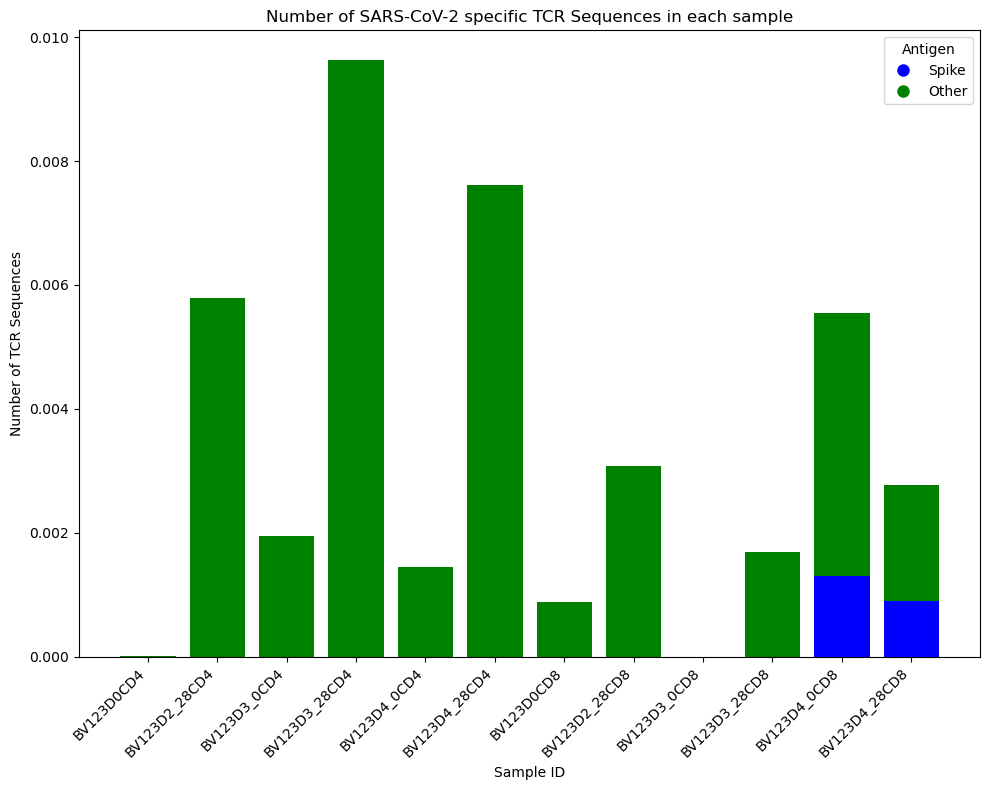

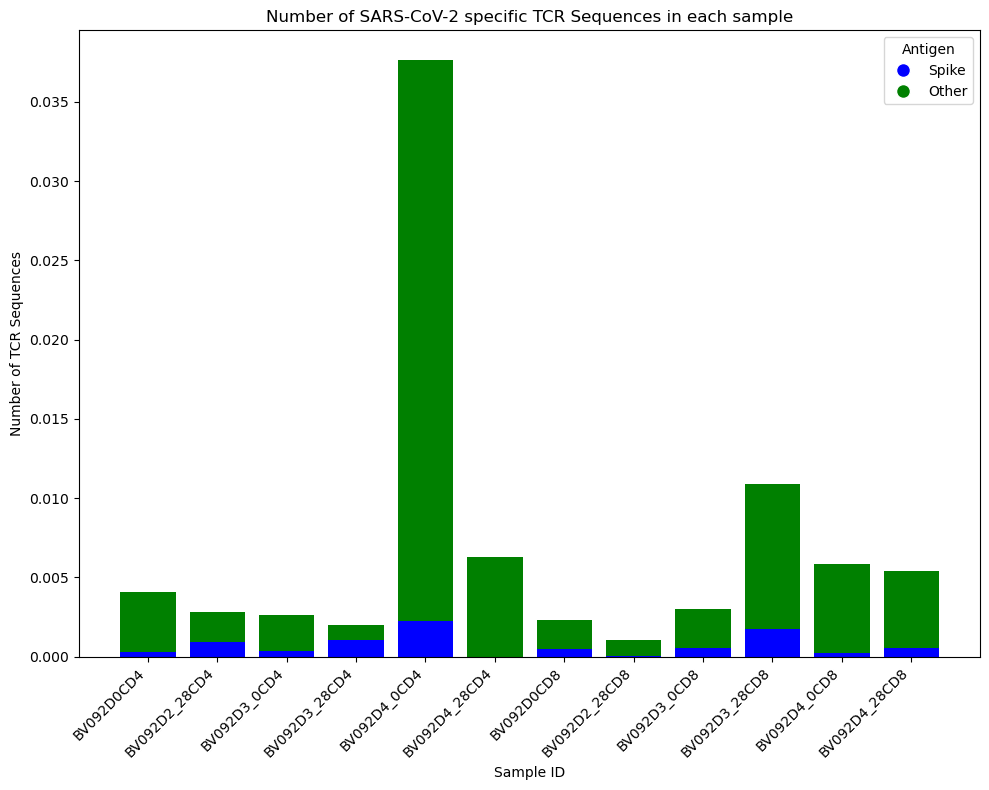

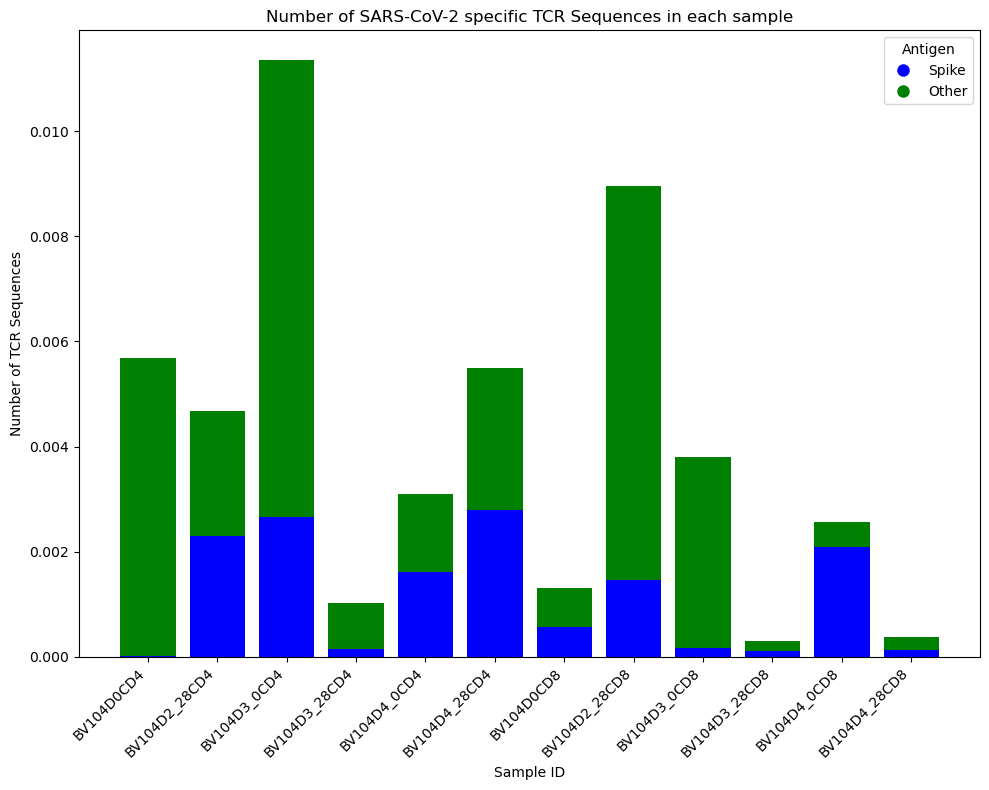

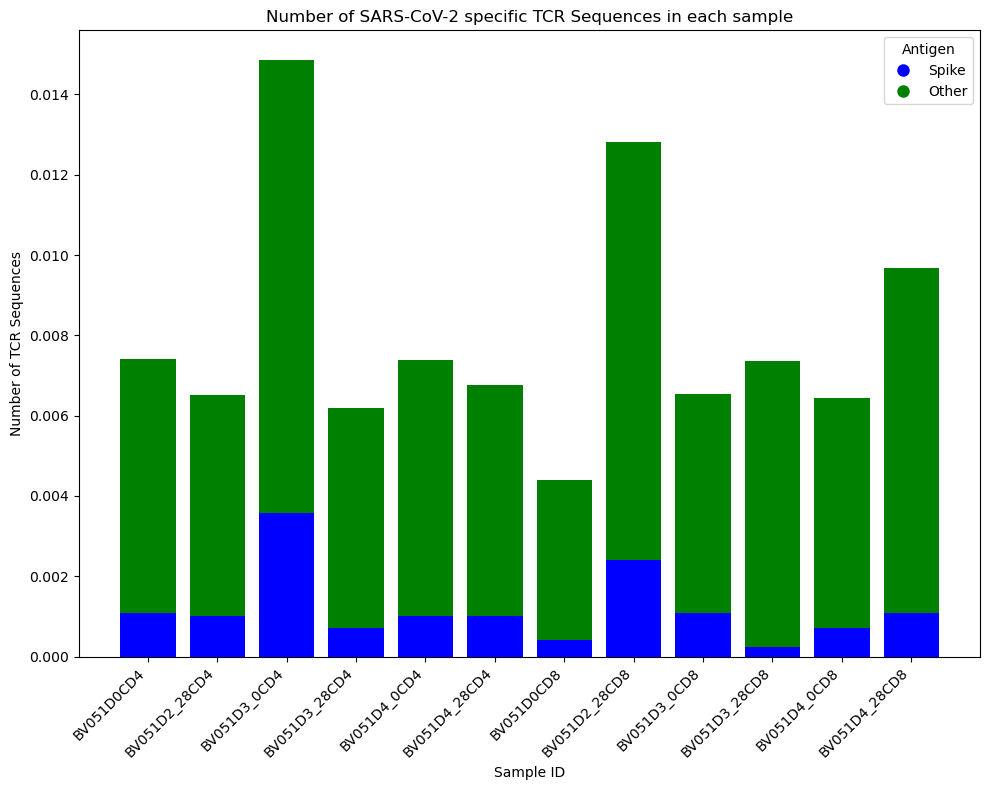

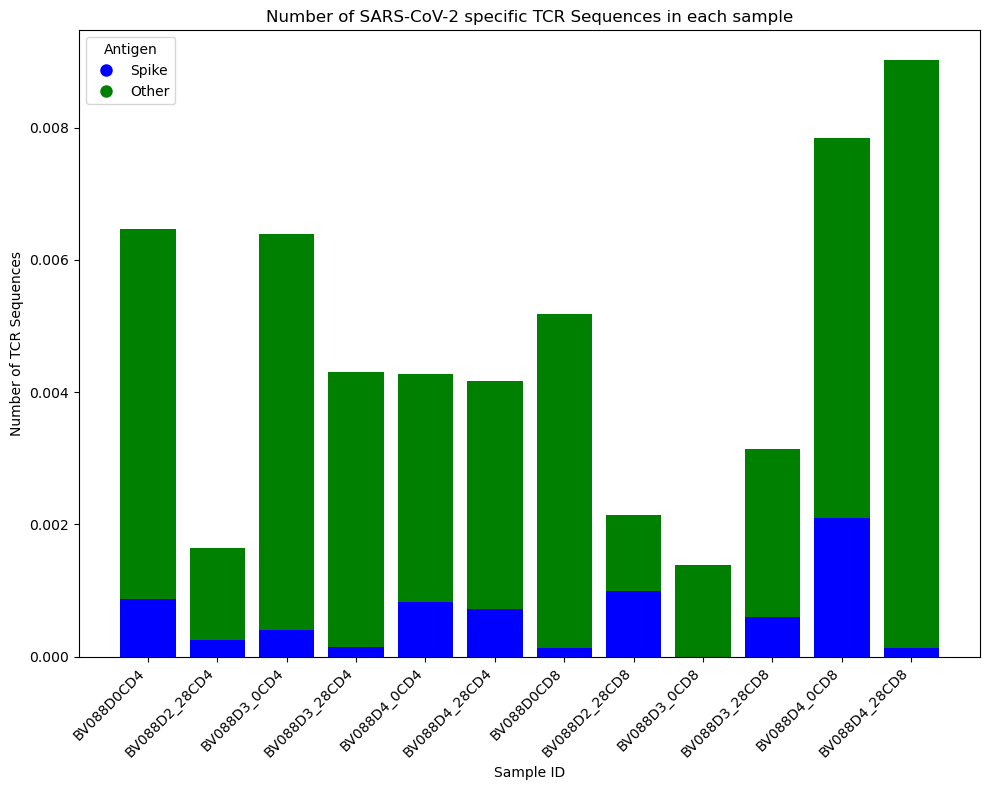

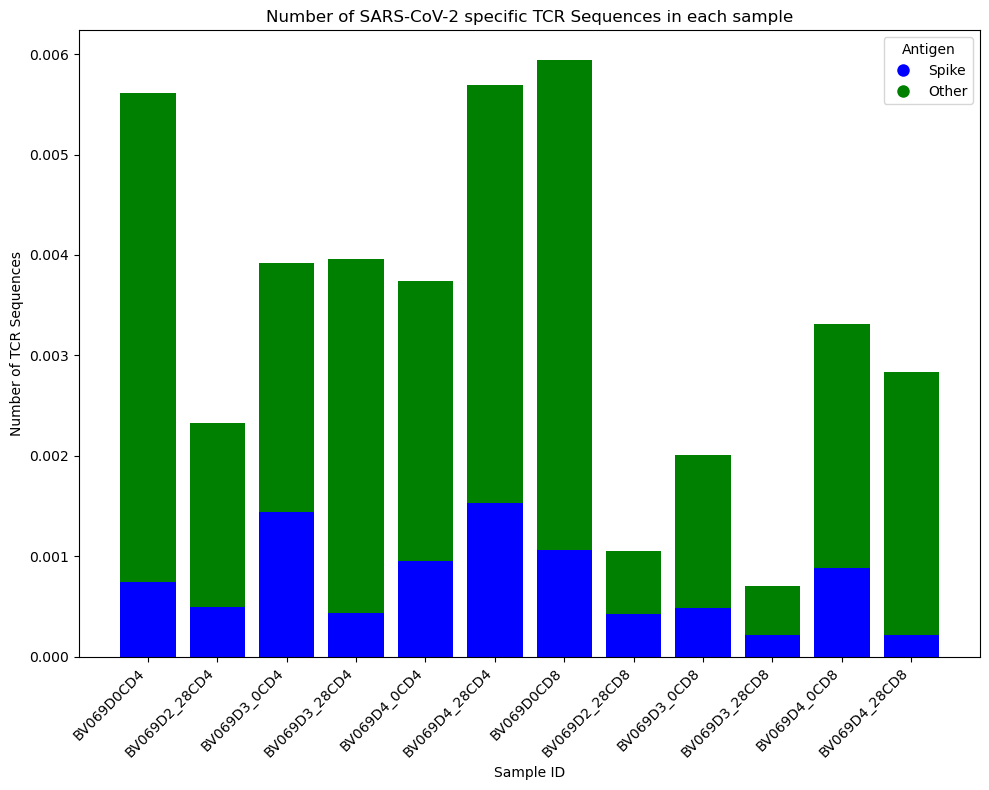

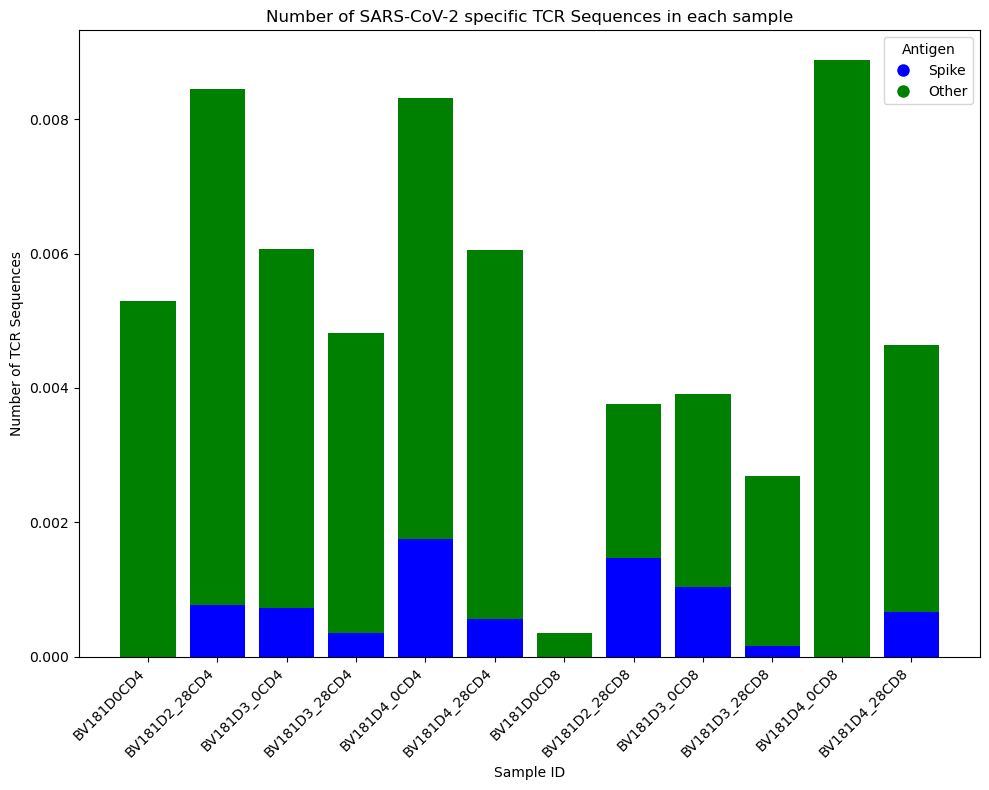

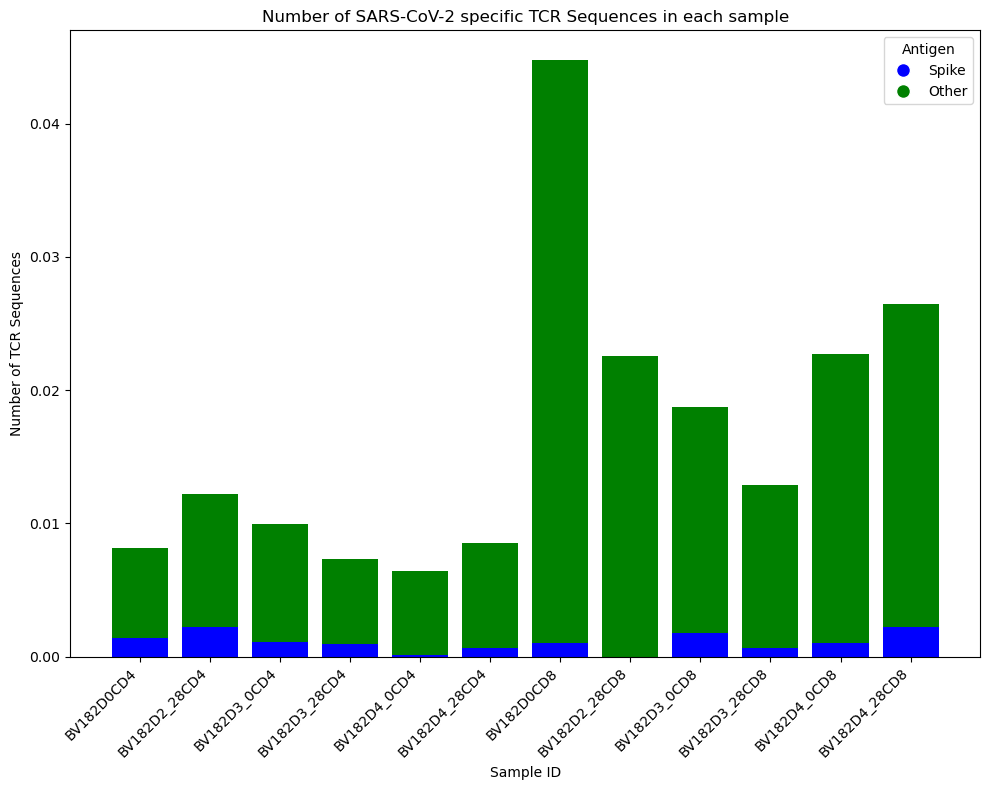

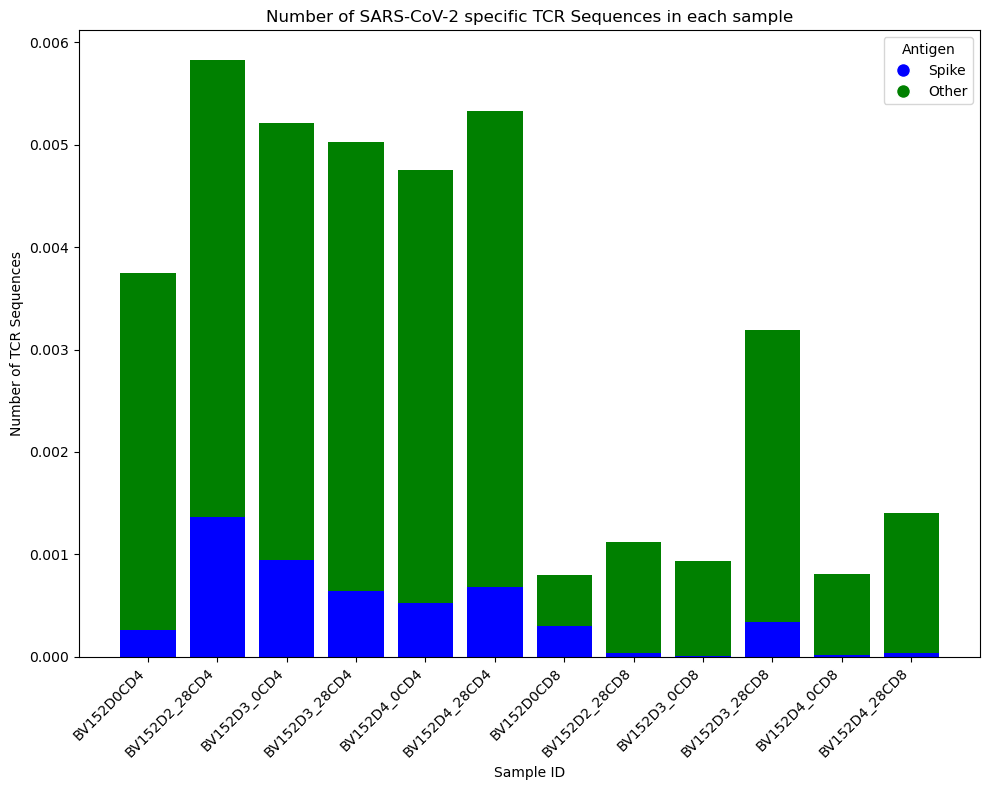

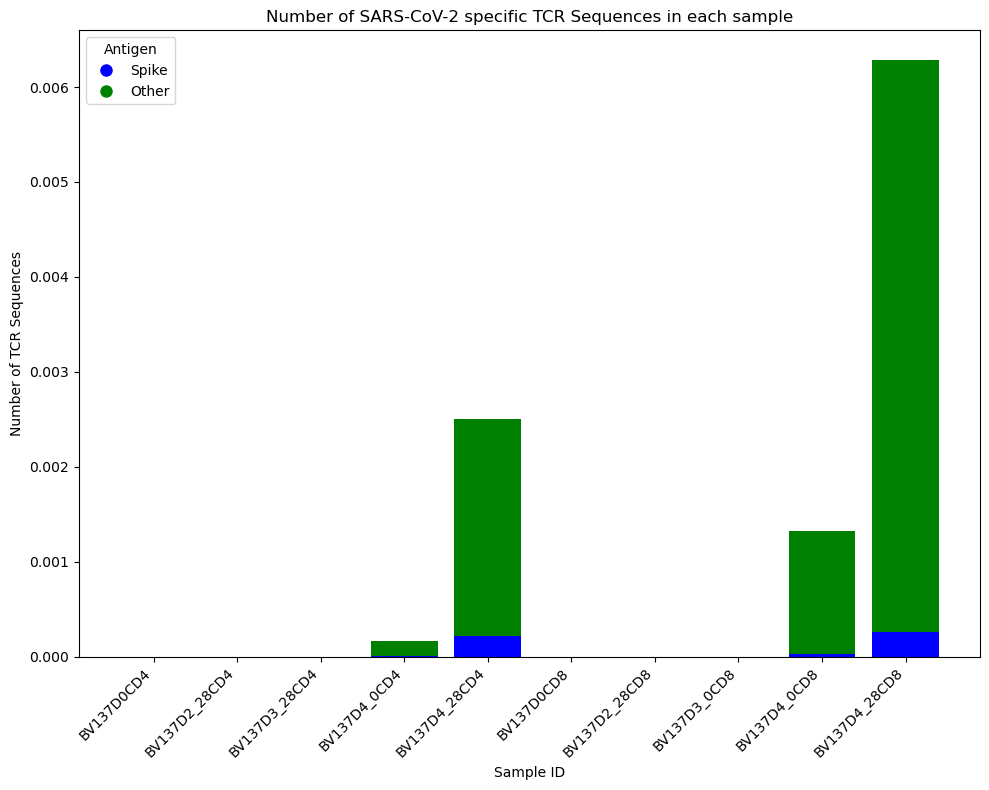

In [14]:
for sample in samples:
    plot_spike({key: value for key, value in cov_results.items() if sample in key})

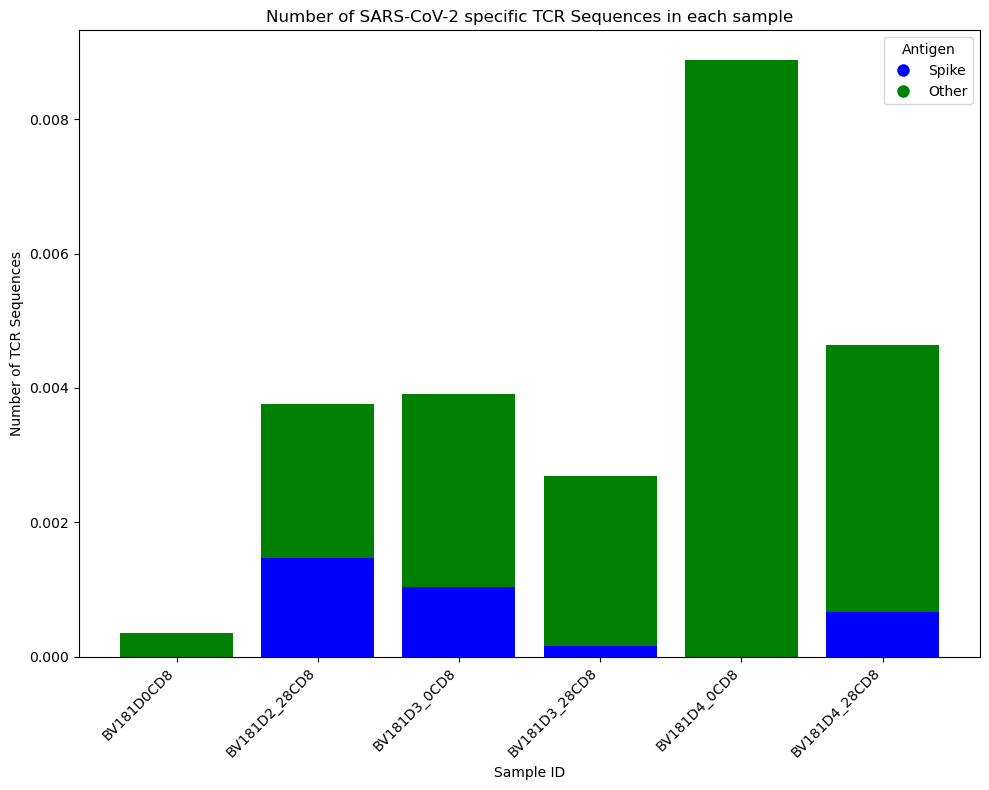

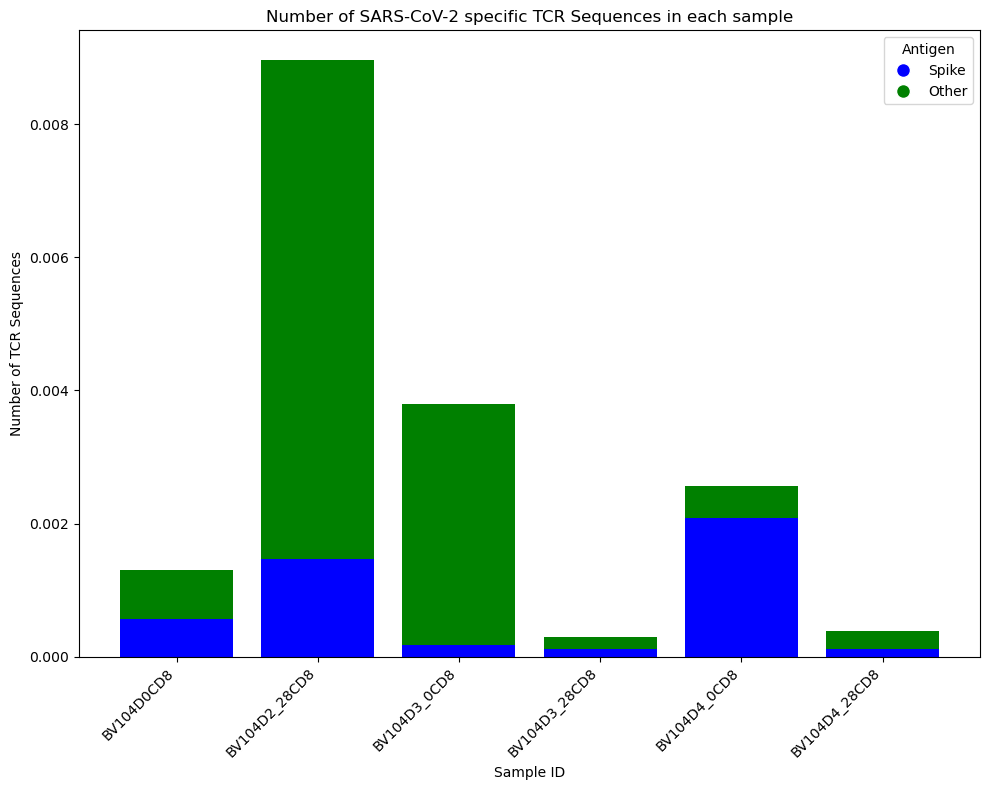

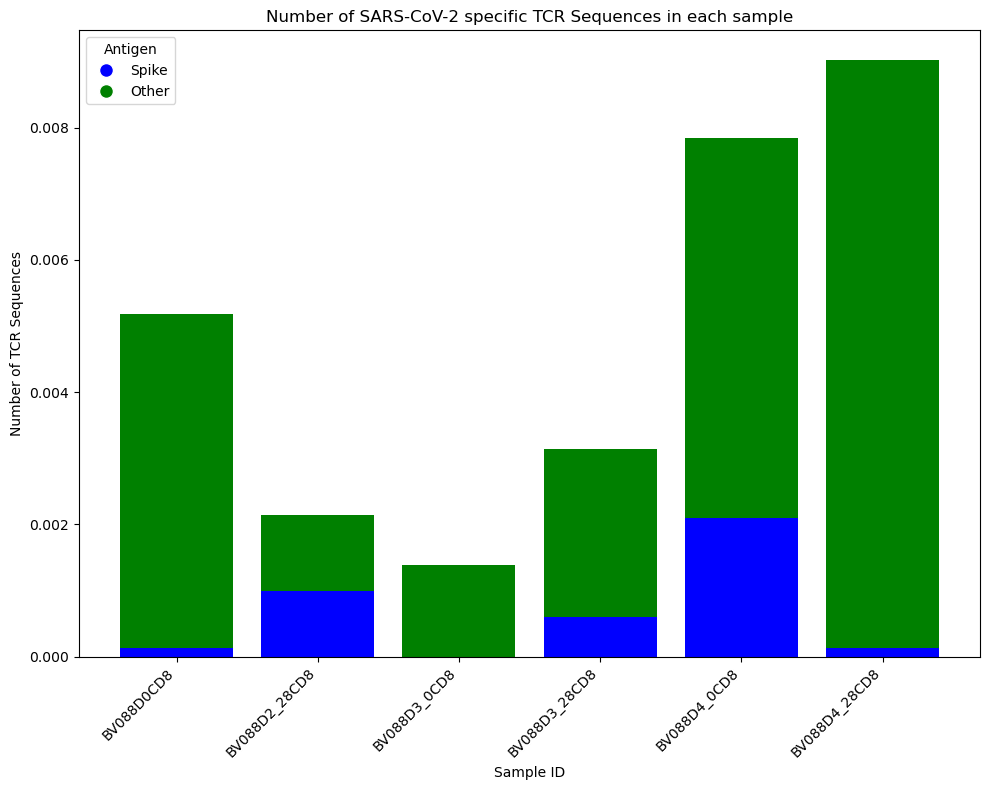

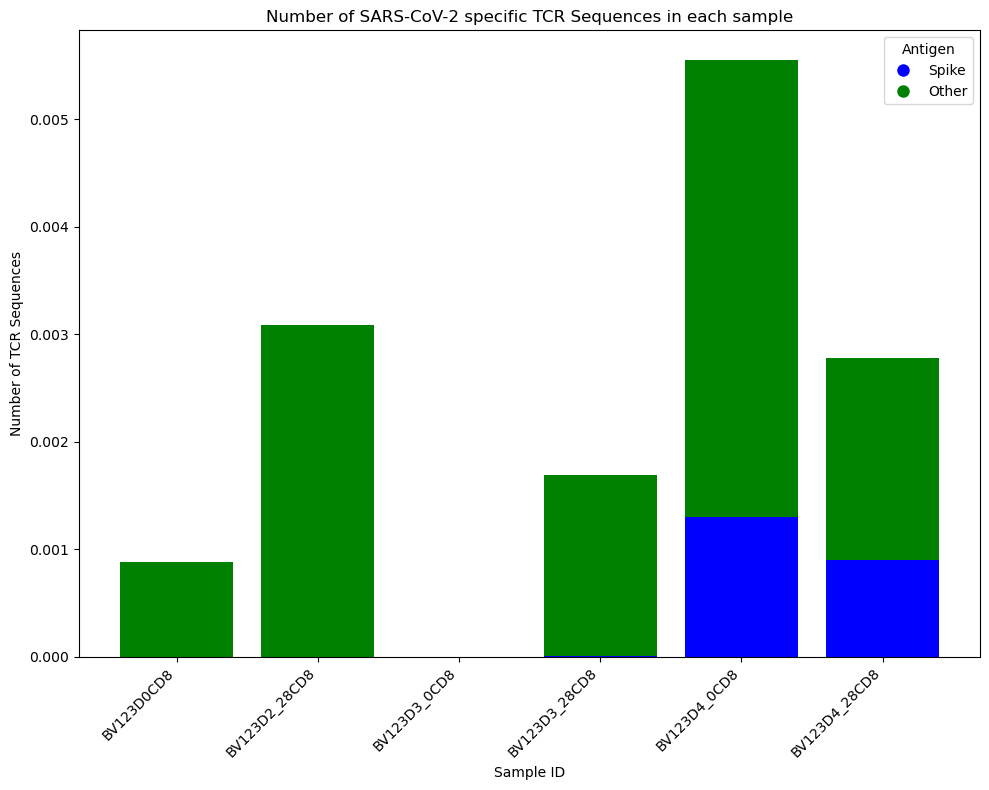

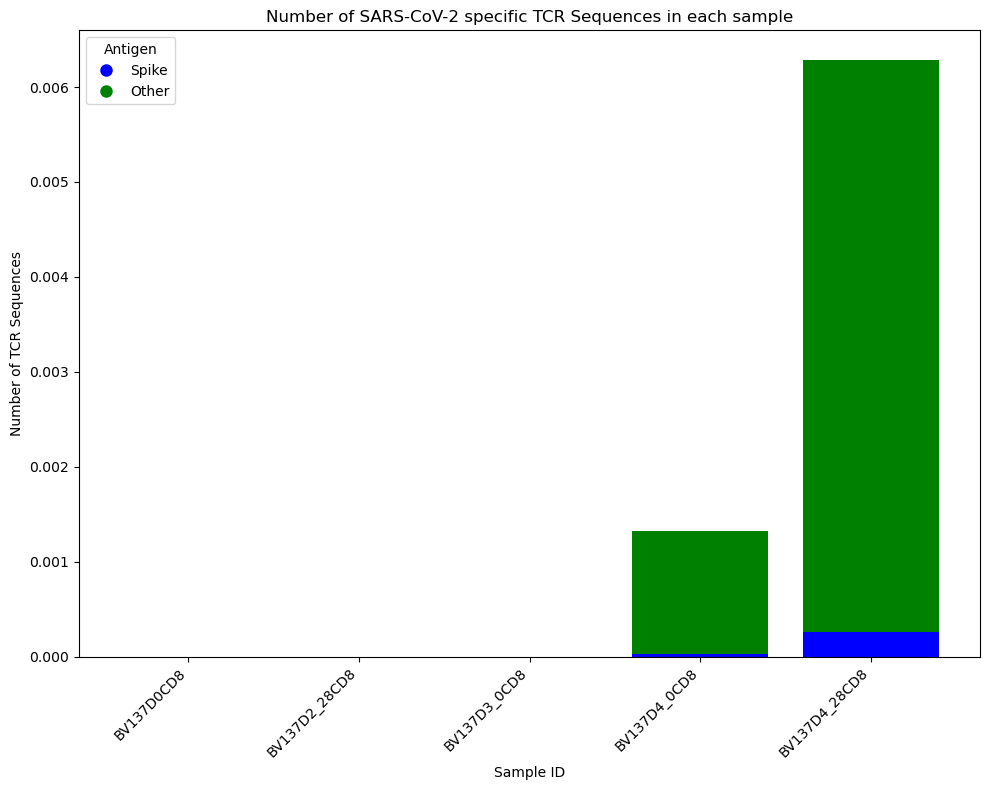

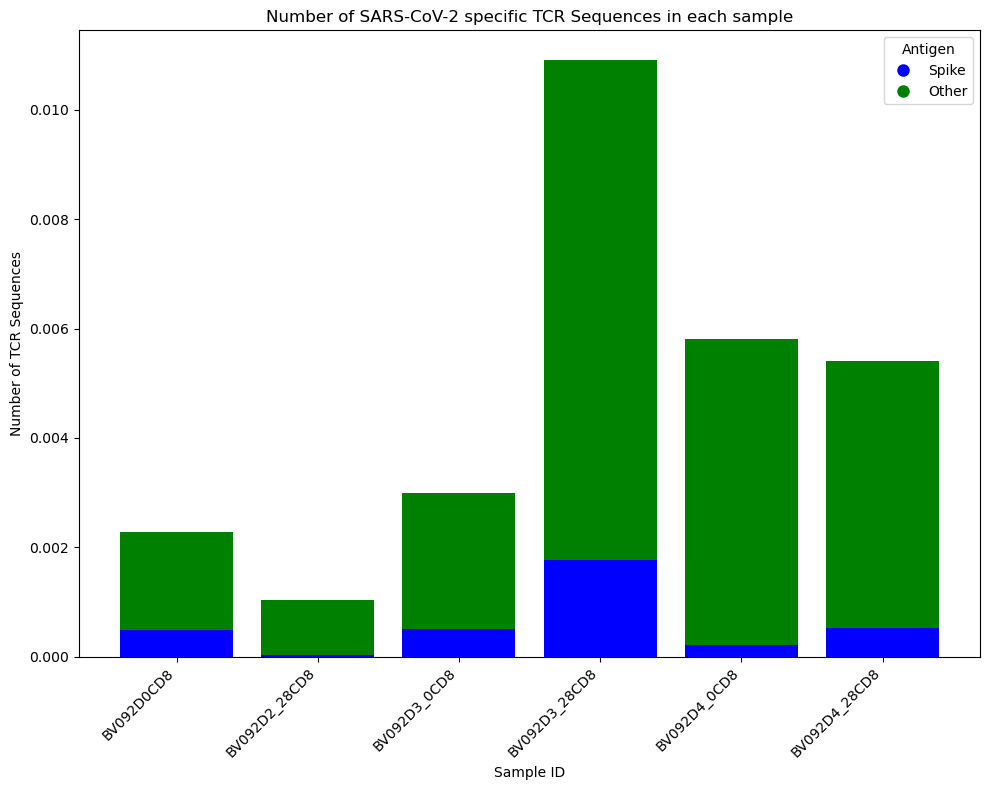

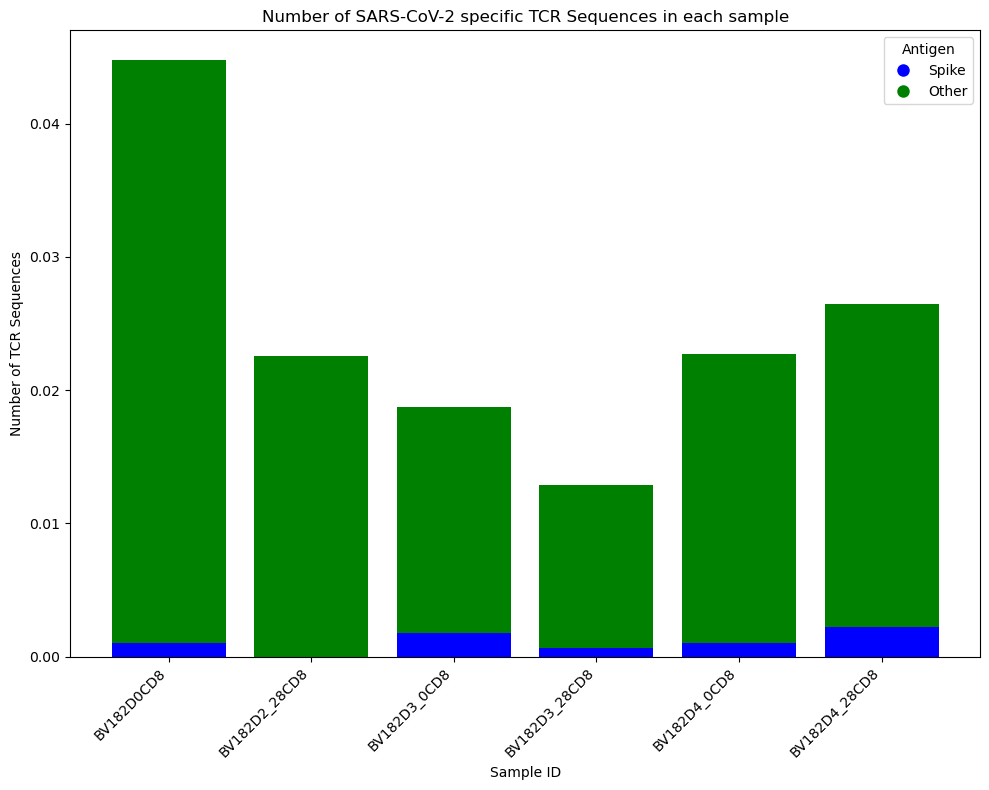

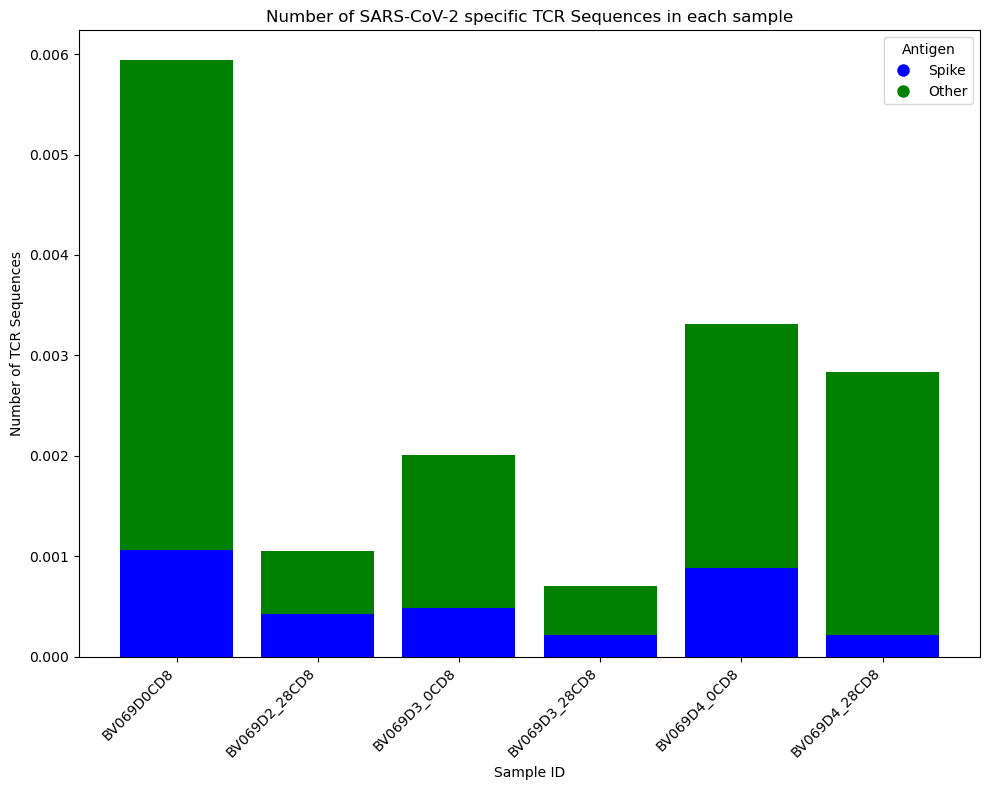

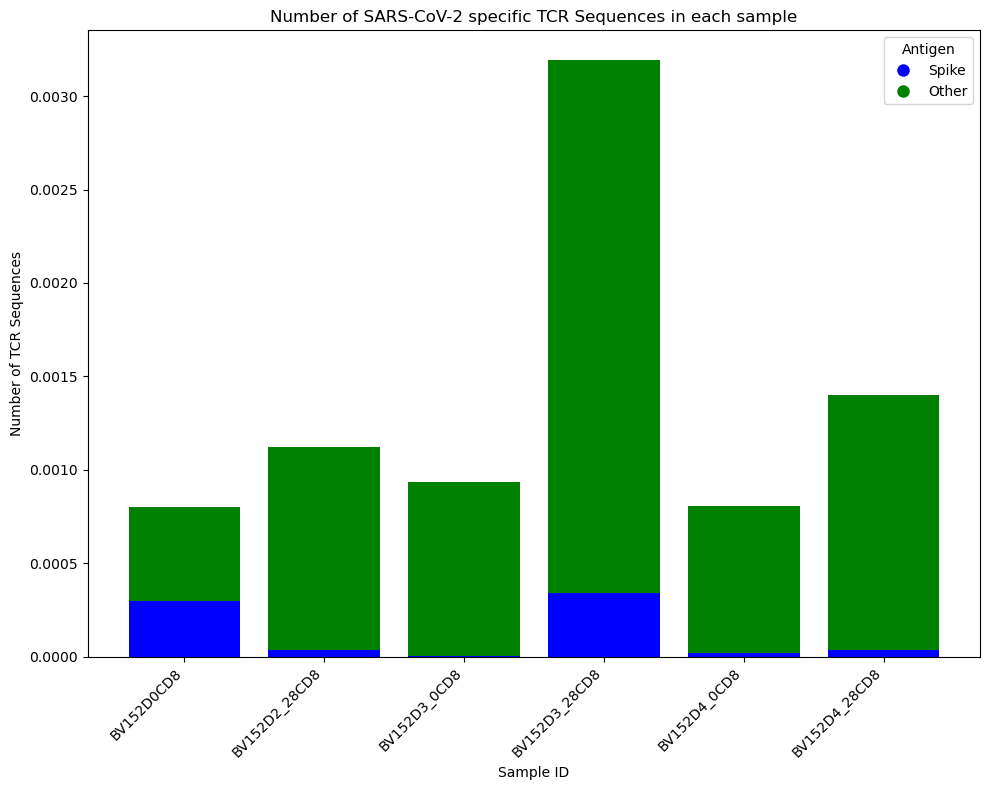

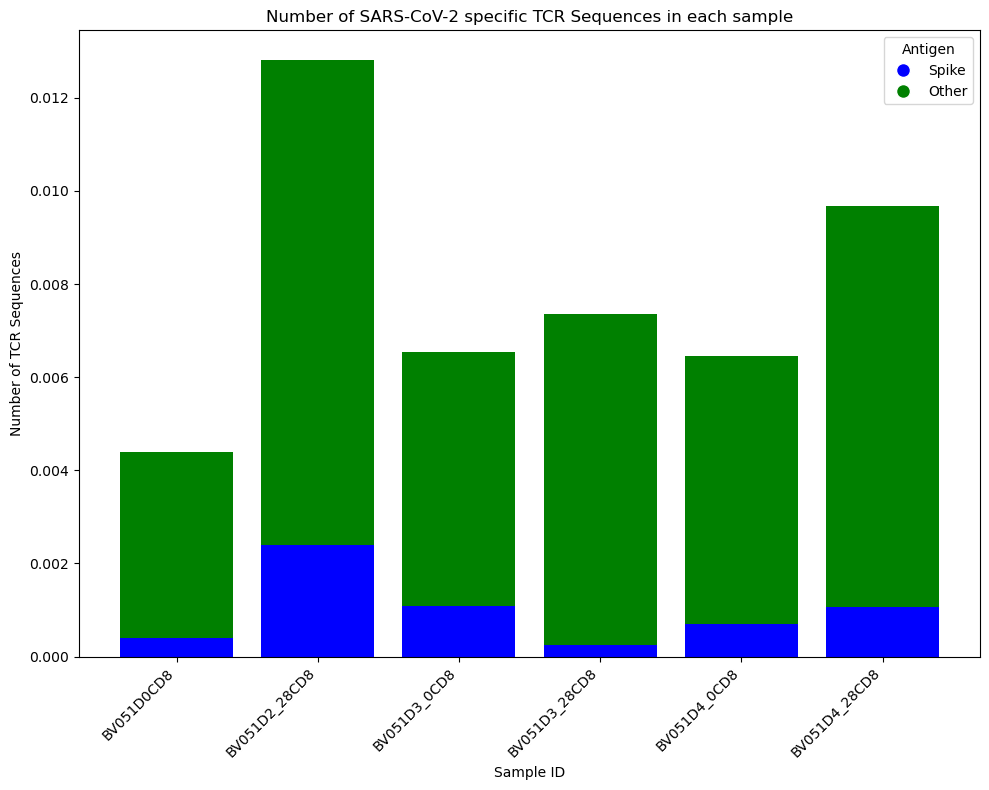

In [82]:
def plot_spikecd8(data_frames):
    # Create a bar graph showing the number of rows for each DataFrame
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # Extract TCR sequences count and file names
    sample_ids = list(data_frames.keys())
    row_counts = [len(df) for df in data_frames.values()]

    # Sort sample IDs based on CD4 and CD8
    sorted_sample_ids_cd8 = sorted([id for id in sample_ids if id.endswith('CD8')])
    sorted_sample_ids = sorted_sample_ids_cd8

    # Extract all unique TCR chains across all samples
    all_tcr_chains = set(chain for df in data_frames.values() for chain in df['v_call'].str[:3].unique())

    # Create a color map for TCR chains
    tcr_colors = {'Spike': 'blue', 'Other': 'green'}

    # Initialize bottom values for stacking
    bottom = [0] * len(sorted_sample_ids)

    # Plotting for all samples
    for sample_id in sorted_sample_ids:

        #Spike
        count = np.sum(data_frames[sample_id][data_frames[sample_id]['Epitope'].isin(spike)]["cloneFraction"])
        ax.bar(sample_id, count, color='blue', bottom=bottom[sorted_sample_ids.index(sample_id)])
        bottom[sorted_sample_ids.index(sample_id)] += count
        
        #Other
        count = np.sum(data_frames[sample_id][~data_frames[sample_id]['Epitope'].isin(spike)]["cloneFraction"])
        ax.bar(sample_id, count, color='green', bottom=bottom[sorted_sample_ids.index(sample_id)])
        bottom[sorted_sample_ids.index(sample_id)] += count

    # Set x-tick positions and labels
    ax.set_xticks(range(len(sorted_sample_ids)))
    ax.set_xticklabels(sorted_sample_ids, rotation=45, ha='right')

    ax.set_xlabel('Sample ID')
    ax.set_ylabel('Number of TCR Sequences')
    ax.set_title('Number of SARS-CoV-2 specific TCR Sequences in each sample')

    # Add legend for TCR chains
    legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=tcr_colors[tc], markersize=10, label=tc) for tc in tcr_colors.keys()]
    ax.legend(handles=legend_elements, title='Antigen')

    # Show the plot
    plt.tight_layout()
    plt.show()
    
for sample in samples:
    plot_spikecd8({key: value for key, value in cov_results.items() if sample in key})

In [11]:
def enrich_tcr(sample,data_frame,t1='D0',t2='D2_28',chain='CD8'):
    s1cd8 = sample+t1+chain
    s2cd8 = sample+t2+chain
    
    df1 = data_frame[s1cd8]
    df2 = data_frame[s2cd8]
    
    merged_df = pd.merge(df1, df2, on='junction_aa', how='outer', suffixes=('_df1', '_df2'))
    
    merged_df = merged_df.fillna(0)
    
    # Define hypergeometric calculation as a function
    def calculate_hypergeom(row, df1, df2):
        M = df1['cloneCount'].sum() + df2['cloneCount'].sum()  # Total number of items in the population
        n = row['cloneCount_df2'] + row['cloneCount_df1'] +1      # Total number of successes in the population
        N = df2['cloneCount'].sum()                            # Sample size
        x = row['cloneCount_df2']                              # Number of successes in the sample
        return hypergeom.sf(x - 1, M, n, N)

    # Calculate hypergeometric p-values using list comprehension
    merged_df['p_value'] = [calculate_hypergeom(row, df1, df2) for index, row in merged_df.iterrows()]
    
    reject, corrected_p_values, _, _ = multipletests(merged_df['p_value'], method='fdr_bh')
    merged_df['corrected_p_value'] = corrected_p_values
    
    # Filter significant clonotypes based on a chosen significance level (e.g., 0.05)
    significant_clonotypes = merged_df[merged_df['corrected_p_value'] < 0.05]

    # Print or use significant_clonotypes as needed
    #print(significant_clonotypes)
    
    return(merged_df)

sample = 'BV123'
#sample = 'BV069'

first = enrich_tcr(sample,result_dict,t1='D0',t2='D2_28')
first
second = enrich_tcr(sample,result_dict,t1='D3_0',t2='D3_28')
second
third = enrich_tcr(sample,result_dict,t1='D4_0',t2='D4_28')
third
    
    

v_call_df1                                     junction_aa j_call_df1  \
0       TRAV1-2  CAVRDRNYQLIWGAGTKLIIKPE_PESRLLQ*H*RLCNTNAGKSTF     TRAJ27   
1       TRAV1-2                                    CAVRDSNYQLIW     TRAJ33   
2       TRAV1-2  CAVMDSNYQLIWGAGTKLIIKPE_PESRLLQ*H*RLCNTNAGKSTF     TRAJ27   
3       TRAV1-2                                    CAVMDSNYQLIW     TRAJ33   
4        TRAV17                                 CATVGRMDSSYKLIF     TRAJ12   
...         ...                                             ...        ...   
2468          0                                CASSFPGQDEIYGYTF          0   
2469          0                              CARNTPCRGRGFVYEQYF          0   
2470          0                                CARTRAMDSDQSEAFF          0   
2471          0                                 CASKPGLAGAESQYF          0   
2472          0                                  CASRDHSKNYEQYF          0   

      cloneCount_df1  cloneFraction_df1  Epitope_df1  Score_df1 v_call_df2  \
0               30.0           0.000066  MR1:5-OP-RU   0.657703          0   
1              367.0           0.000430  MR1:5-OP-RU   0.502898          0   
2              449.0           0.000401  MR1:5-OP-RU   0.464184          0   
3              173.0           0.000216  MR1:5-OP-RU   0.464184          0   
4              283.0           0.000619   TPRVTGGGAM   0.425094          0   
...              ...                ...          ...        ...        ...   
2468             0.0           0.000000            0   0.000000     TRBV18   
2469             0.0           0.000000            0   0.000000     TRBV19   
2470             0.0           0.000000            0   0.000000     TRBV19   
2471             0.0           0.000000            0   0.000000     TRBV19   
2472             0.0           0.000000            0   0.000000     TRBV19   

     j_call_df2  cloneCount_df2  cloneFraction_df2 Epitope_df2  Score_df2  \
0             0             0.0           0.000000           0        0.0   
1             0             0.0           0.000000           0        0.0   
2             0             0.0           0.000000           0        0.0   
3             0             0.0           0.000000           0        0.0   
4             0             0.0           0.000000           0        0.0   
...         ...             ...                ...         ...        ...   
2468    TRBJ1-2           429.0           0.000378        None        0.0   
2469    TRBJ2-7           431.0           0.000345        None        0.0   
2470    TRBJ1-1           336.0           0.000269        None        0.0   
2471    TRBJ2-5            47.0           0.000072        None        0.0   
2472    TRBJ2-7          1023.0           0.000820        None        0.0   

            p_value  corrected_p_value  
0      1.000000e+00       1.000000e+00  
1      1.000000e+00       1.000000e+00  
2      1.000000e+00       1.000000e+00  
3      1.000000e+00       1.000000e+00  
4      1.000000e+00       1.000000e+00  
...             ...                ...  
2468  3.396883e-110      2.800164e-109  
2469  1.027995e-110      8.559704e-110  
2470   4.527206e-86       3.302590e-85  
2471   1.271194e-11       5.457747e-11  
2472  1.278515e-264      1.904679e-263  

[2473 rows x 15 columns]

In [10]:
%load_ext line_profiler

%lprun -f enrich_tcr enrich_tcr(sample,result_dict,t1='D0',t2='D2_28')

In [81]:
second

v_call_df1      junction_aa j_call_df1  cloneCount_df1  cloneFraction_df1  \
0     TRAV12-1      CVVNREDDMRF     TRAJ43           115.0           0.000039   
1     TRAV12-1     CVVNFNTDKLIF     TRAJ34           863.0           0.000114   
2     TRAV12-1      CVVNGGDDMRF     TRAJ43            27.0           0.000003   
3     TRAV12-1   CVVNQPSGNTPLVF     TRAJ29           240.0           0.000070   
4     TRAV12-1      CVVNHGNKLVF     TRAJ47            20.0           0.000007   
..         ...              ...        ...             ...                ...   
218          0    CAVIGSGNTPLVF          0             0.0           0.000000   
219          0  CASSLGLAGTDTQYF          0             0.0           0.000000   
220          0   CASSLRDPLNEQFF          0             0.0           0.000000   
221          0    CASSDGTSVEQLF          0             0.0           0.000000   
222          0    CASSDGTSVEQFF          0             0.0           0.000000   

    Epitope_df1  Score_df1 v_call_df2 j_call_df2  cloneCount_df2  \
0     YLQPRTFLL   0.807423   TRAV12-1     TRAJ43          3573.0   
1     YLQPRTFLL   0.415239   TRAV12-1     TRAJ34           375.0   
2     YLQPRTFLL   0.414564          0          0             0.0   
3     YLQPRTFLL   0.412144          0          0             0.0   
4     YLQPRTFLL   0.393181          0          0             0.0   
..          ...        ...        ...        ...             ...   
218           0   0.000000    TRAV1-2     TRAJ29            58.0   
219           0   0.000000    TRBV5-4    TRBJ2-3           294.0   
220           0   0.000000     TRBV27    TRBJ2-1           130.0   
221           0   0.000000    TRBV5-1    TRBJ2-1             2.0   
222           0   0.000000    TRBV5-1    TRBJ2-1             8.0   

     cloneFraction_df2  Epitope_df2  Score_df2        p_value  \
0         1.081733e-03    YLQPRTFLL   0.807423   0.000000e+00   
1         1.161533e-04    YLQPRTFLL   0.415239   1.000000e+00   
2         0.000000e+00            0   0.000000   1.000000e+00   
3         0.000000e+00            0   0.000000   1.000000e+00   
4         0.000000e+00            0   0.000000   1.000000e+00   
..                 ...          ...        ...            ...   
218       1.813771e-05    LLYDANYFL   0.233489   2.907856e-22   
219       9.492317e-05    MPASWVMRI   0.233182  6.752428e-116   
220       4.215112e-05  HTTDPSFLGRY   0.230807   1.238952e-50   
221       6.254384e-07    YLQPRTFLL   0.230471   3.521738e-01   
222       2.501754e-06    YLQPRTFLL   0.230471   3.807528e-03   

     corrected_p_value  
0         0.000000e+00  
1         1.000000e+00  
2         1.000000e+00  
3         1.000000e+00  
4         1.000000e+00  
..                 ...  
218       1.350941e-21  
219      1.505791e-114  
220       1.023283e-49  
221       7.775718e-01  
222       9.873007e-03  

[223 rows x 15 columns]

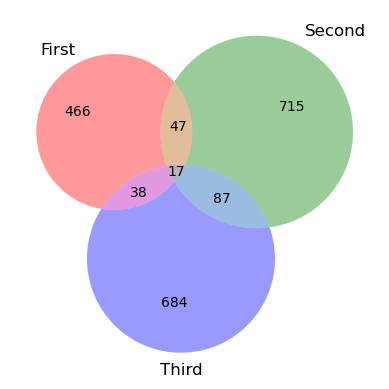

In [12]:
def plot_tcrvenn(first,second,third):
    # Extract sets from dataframes
    set_first = set(first['junction_aa'])
    set_second = set(second['junction_aa'])
    set_third = set(third['junction_aa'])

    # Create a Venn diagram
    venn_labels = {'100': len(set_first - set_second - set_third),
                   '010': len(set_second - set_first - set_third),
                   '001': len(set_third - set_first - set_second),
                   '110': len(set_first & set_second - set_third),
                   '101': len(set_first & set_third - set_second),
                   '011': len(set_second & set_third - set_first),
                   '111': len(set_first & set_second & set_third)}

    venn_diagram = venn3(subsets=(len(set_first), len(set_second), len(set_first & set_second),
                                  len(set_third), len(set_first & set_third), len(set_second & set_third),
                                  len(set_first & set_second & set_third)),
                         set_labels=('First', 'Second', 'Third'))
    
    # Display the intersection numbers
    #for idx, label in enumerate(venn_labels):
    #    venn_diagram.get_label_by_id(idx).set_text(venn_labels[label])

    plt.show()
    
plot_tcrvenn(first[first['corrected_p_value'] < 0.05],
             second[second['corrected_p_value'] < 0.05],
             third[third['corrected_p_value'] < 0.05])

In [13]:
merged_fs = pd.merge(first[first['corrected_p_value'] < 0.05], second[second['corrected_p_value'] < 0.05], on='junction_aa', how='inner', suffixes=('_d1', '_d2'))
merged_all = pd.merge(merged_fs, third[third['corrected_p_value'] < 0.05], on='junction_aa', how='inner', suffixes=('_', '_d3'))

merged_all

v_call_df1_d1         junction_aa j_call_df1_d1  cloneCount_df1_d1  \
0         TRAV25       CAGGNQAGTALIF        TRAJ15             2571.0   
1         TRAV20      CAVQAGGSNYKLTF        TRAJ53               43.0   
2         TRAV19     CALISQEGSARQLTF        TRAJ22             4321.0   
3              0        SKSGAGSYQLTF             0                0.0   
4              0    CASRPLGQGSSYEQYF             0                0.0   
5              0      CASSLSTSQQTQYF             0                0.0   
6              0       CGAATDSNYQLIW             0                0.0   
7              0     CASSYGQGPTYEQYF             0                0.0   
8              0       CALTSTGANNLFF             0                0.0   
9              0         CADTGGFKTIF             0                0.0   
10             0       CATWDG_NYKKLF             0                0.0   
11             0          CATWVYKKLF             0                0.0   
12             0     CATWDRP_DYYKKLF             0                0.0   
13             0   CATWDRPF_PSDWIKTF             0                0.0   
14             0  CALGDRSYSGAGSYQLTF             0                0.0   
15             0    CAGSGFQE_GADGLTF             0                0.0   
16             0  CAASHFLGLGDDTDKLIF             0                0.0   

    cloneFraction_df1_d1 Epitope_df1_d1  Score_df1_d1 v_call_df2_d1  \
0               0.013053      CTELKLSDY      0.068949        TRAV25   
1               0.000103       TAFTIPSI      0.031990        TRAV20   
2               0.020849           None      0.000000        TRAV19   
3               0.000000              0      0.000000      TRAV12-3   
4               0.000000              0      0.000000        TRBV28   
5               0.000000              0      0.000000       TRBV5-1   
6               0.000000              0      0.000000        TRAV34   
7               0.000000              0      0.000000         TRBV9   
8               0.000000              0      0.000000         TRAV6   
9               0.000000              0      0.000000         TRAV6   
10              0.000000              0      0.000000         TRGV4   
11              0.000000              0      0.000000         TRGV8   
12              0.000000              0      0.000000         TRGV5   
13              0.000000              0      0.000000         TRGV3   
14              0.000000              0      0.000000         TRDV1   
15              0.000000              0      0.000000        TRAV25   
16              0.000000              0      0.000000     TRAV29DV5   

   j_call_df2_d1  cloneCount_df2_d1  ...  Epitope_df1 Score_df1  v_call_df2  \
0         TRAJ15            17328.0  ...    CTELKLSDY  0.068949      TRAV25   
1         TRAJ53              608.0  ...     TAFTIPSI  0.031990      TRAV20   
2         TRAJ22            13226.0  ...         None  0.000000      TRAV19   
3         TRAJ28              606.0  ...    YLQPRTFLL  0.159674    TRAV12-3   
4        TRBJ2-7              125.0  ...    MPASWVMRI  0.156470      TRBV28   
5        TRBJ2-5             4090.0  ...  HTTDPSFLGRY  0.128712     TRBV5-1   
6         TRAJ33             3720.0  ...    KLGGALQAK  0.086882      TRAV34   
7        TRBJ2-7              348.0  ...            0  0.000000       TRBV9   
8         TRAJ36              126.0  ...    NLVPMVATV  0.060098       TRAV6   
9          TRAJ9             1818.0  ...    SPRWYFYYL  0.040148       TRAV6   
10         TRGJ1               67.0  ...            0  0.000000       TRGV4   
11         TRGJ1               32.0  ...            0  0.000000       TRGV8   
12         TRGJ1              460.0  ...         None  0.000000       TRGV5   
13        TRGJP2             1213.0  ...         None  0.000000       TRGV3   
14        TRAJ28              925.0  ...         None  0.000000       TRDV1   
15        TRAJ45              394.0  ...            0  0.000000      TRAV25   
16         TRDJ1              482.0  ...         None  0.000000   

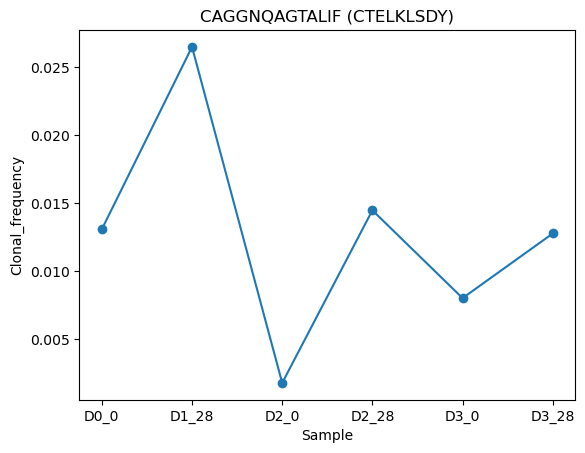

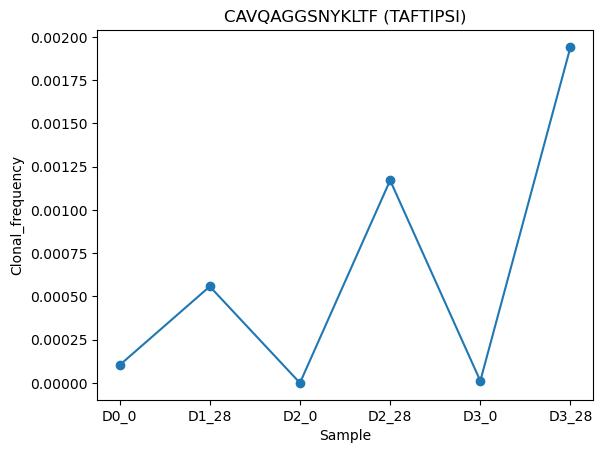

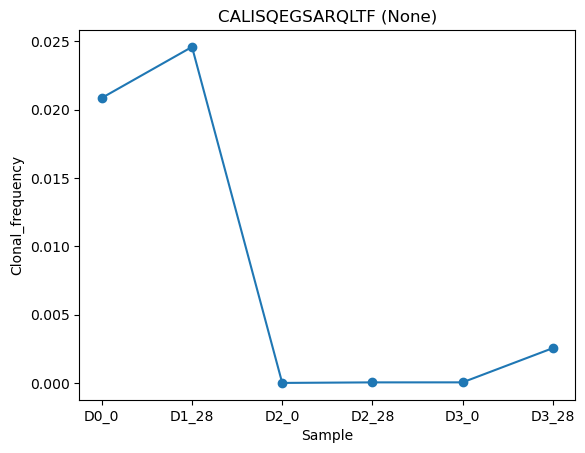

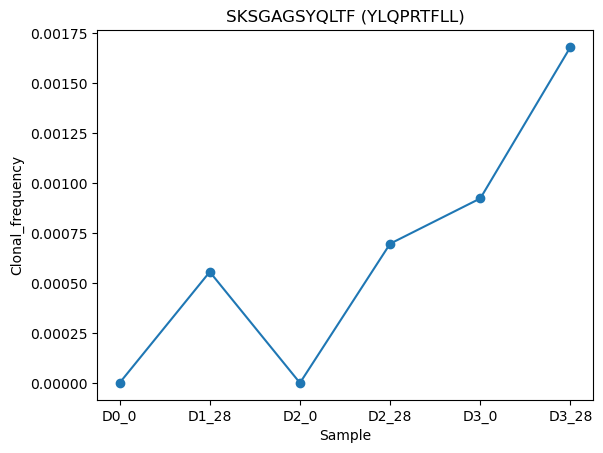

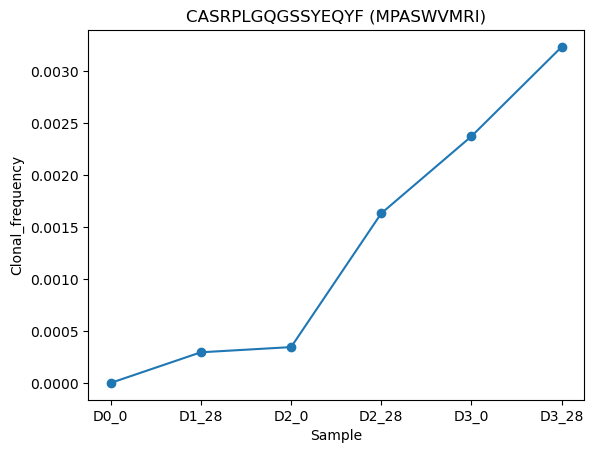

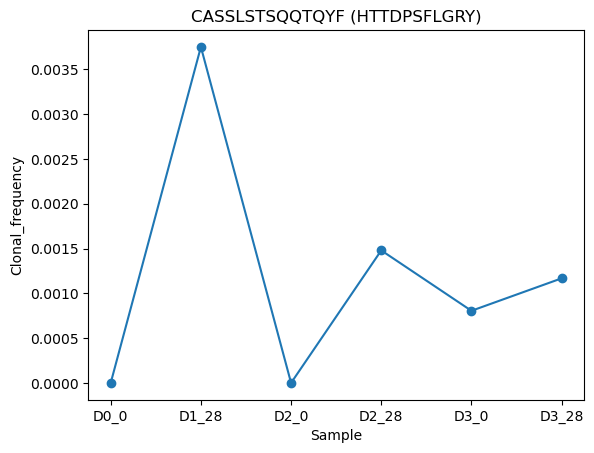

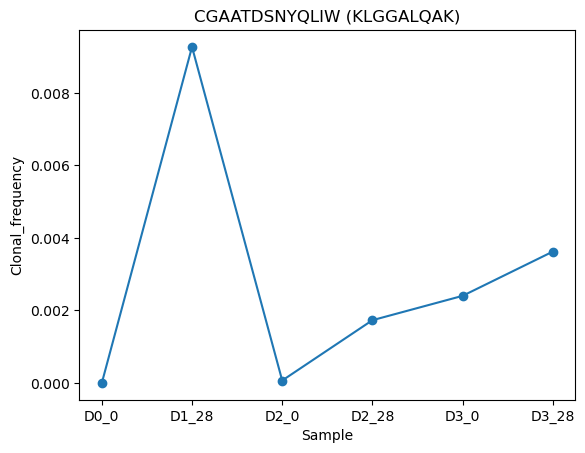

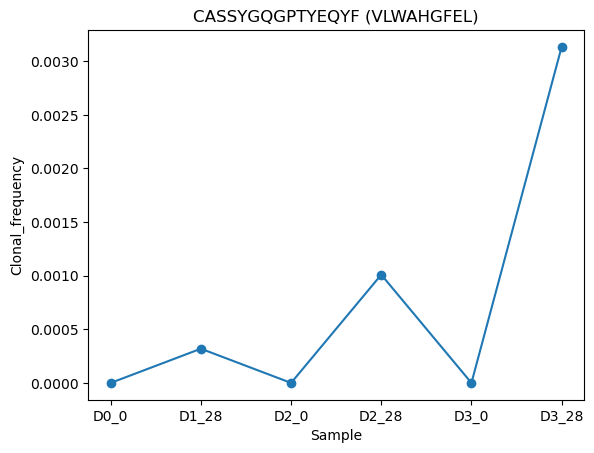

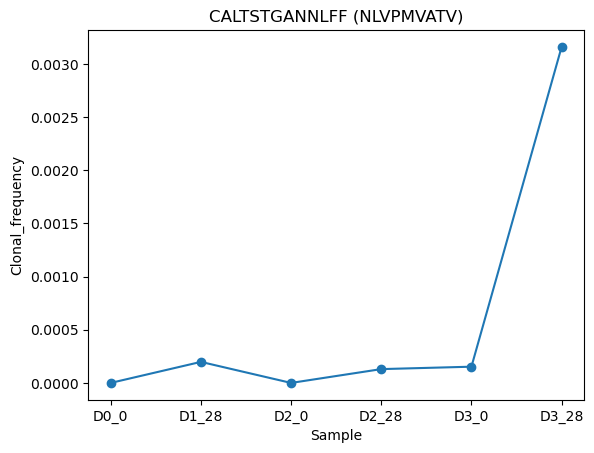

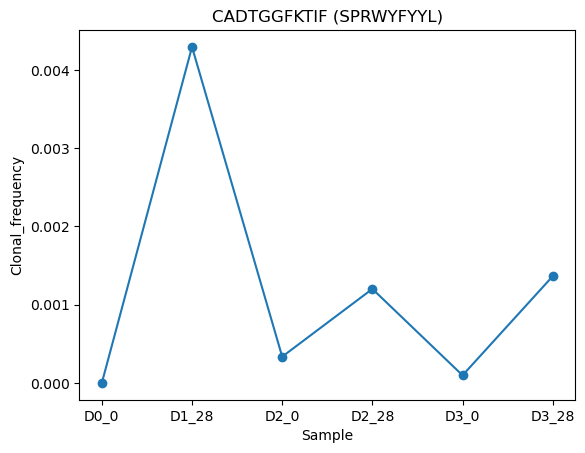

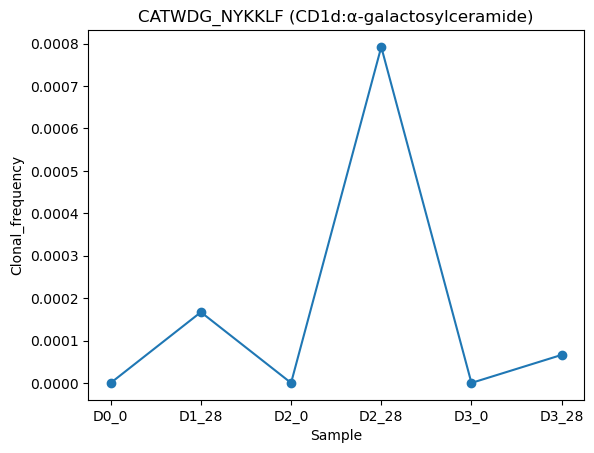

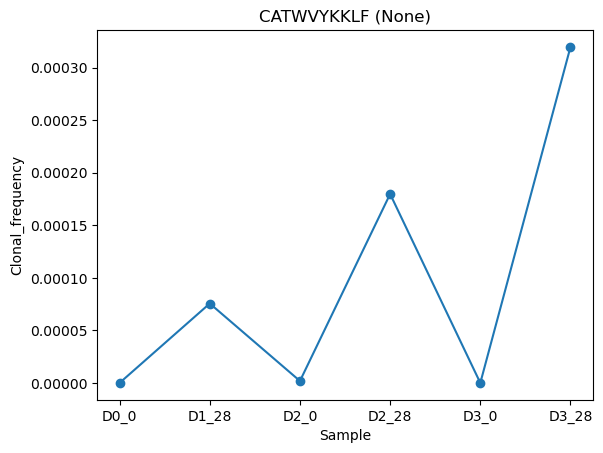

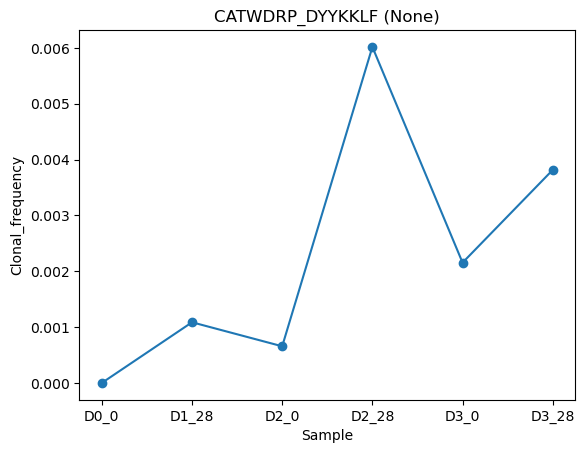

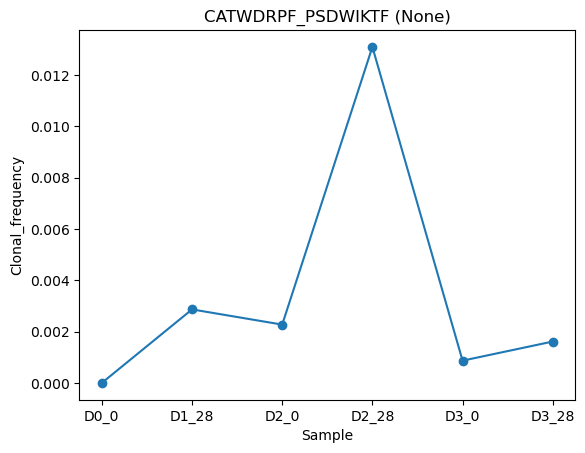

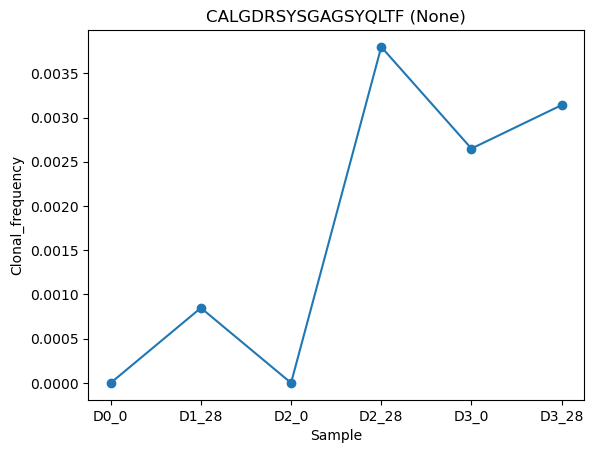

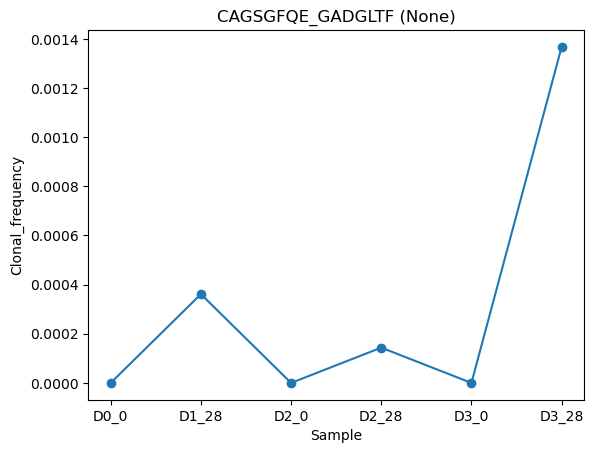

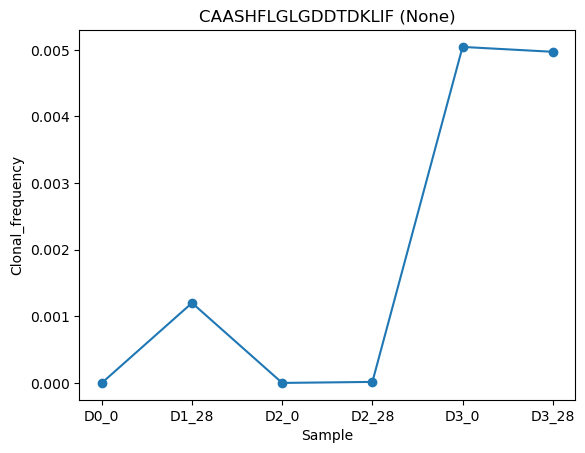

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [14]:
def plot_clonotype(row):
    freq = [row['cloneFraction_df1_d1'],
           row['cloneFraction_df2_d1'],
           row['cloneFraction_df1_d2'],
           row['cloneFraction_df2_d2'],
           row['cloneFraction_df1'],
           row['cloneFraction_df2']]
    ticks = ['D0_0', 'D1_28', 'D2_0', 'D2_28', 'D3_0', 'D3_28']

    # Plot the line
    plt.plot(ticks, freq, marker='o')

    # Labeling the axes and the plot
    plt.xlabel('Sample')
    plt.ylabel('Clonal_frequency')
    plt.title(row['junction_aa']+' ('+row['Epitope_df2_d1']+')')

    # Show the plot
    plt.show()
    
[plot_clonotype(row) for index, row in merged_all.iterrows()]

TRA
TRB
TRG
TRD


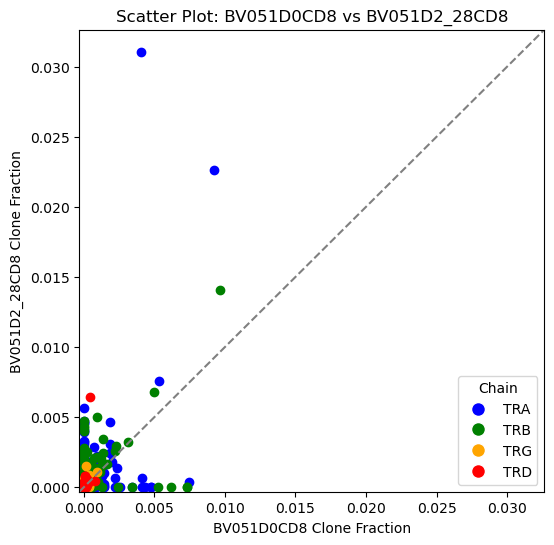

In [42]:
def plot_diff(sample,data_frame,t1='D0',t2='D2_28',chain='CD8'):
    s1cd8 = sample+t1+chain
    s2cd8 = sample+t2+chain
    
    df1 = data_frame[s1cd8]
    df2 = data_frame[s2cd8]
    
    merged_df = pd.merge(df1, df2, on='junction_aa', how='outer', suffixes=('_df1', '_df2'))
    
    merged_df = merged_df.fillna(0)
    
    fig, ax = plt.subplots(figsize=(6, 6))
    
    # Create a color map for TCR chains
    tcr_colors = {'TRA': 'blue', 'TRB': 'green', 'TRG': 'orange', 'TRD': 'red'}
    
    #Make scatter plot of cloneFraction_df1 (on x-axis) versus cloneFraction_df2 (on y-axis)
    tcr_chains = set(merged_df['v_call_df2'].str[:3].unique())
    for chain in tcr_colors.keys():
        print(chain)
        plt.scatter(merged_df['cloneFraction_df1'][merged_df['v_call_df2'].str[:3] == chain], 
                    merged_df['cloneFraction_df2'][merged_df['v_call_df2'].str[:3] == chain], color=tcr_colors[chain])
    #plt.scatter(merged_df['cloneFraction_df1'], merged_df['cloneFraction_df2'])
    plt.title(f'Scatter Plot: {s1cd8} vs {s2cd8}')
    plt.xlabel(f'{s1cd8} Clone Fraction')
    plt.ylabel(f'{s2cd8} Clone Fraction')
    
    # Find the maximum value in both axes
    max_value = max(merged_df['cloneFraction_df1'].max(), merged_df['cloneFraction_df2'].max())

    # Set the limits to start from 0 and extend to the maximum value
    plt.xlim(-max_value*0.01, max_value*1.05)
    plt.ylim(-max_value*0.01, max_value*1.05)

    # Add a dotted line along the diagonal
    plt.plot([0, 1], [0, 1], '--', transform=plt.gca().transAxes, color='gray')
    
     # Add legend for TCR chains
    legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=tcr_colors[tc], markersize=10, label=tc) for tc in tcr_colors.keys()]
    ax.legend(handles=legend_elements, title='Chain',loc=4)
    
    plt.show()
    
plot_diff('BV051',result_dict)
    

In [24]:
result_dict['BV051D2_28CD8'].loc[result_dict['BV051D2_28CD8']['cloneFraction'] > 0.01]

v_call      junction_aa   j_call  cloneCount  cloneFraction    Epitope  \
329   TRAV17   CATDDGDSWGKLQF   TRAJ24     65275.0       0.031069  GILGFVFTL   
2409  TRAV19  CALSEAGNAGNMLTF   TRAJ39     48464.0       0.022655  GILGFVFTL   
3457  TRBV19  CASSKLAGEVNEQFF  TRBJ2-1     29701.0       0.014073  QYIKWPWYI   

         Score  
329   0.236062  
2409  0.084068  
3457  0.066691

In [25]:
result_dict['BV051D2_28CD8'].loc[result_dict['BV051D2_28CD8']['cloneFraction'] > 0.005]

v_call       junction_aa   j_call  cloneCount  cloneFraction  \
257      TRAV12-3    CAMSARSGYSTLTF   TRAJ11     12070.0       0.005646   
329        TRAV17    CATDDGDSWGKLQF   TRAJ24     65275.0       0.031069   
2409       TRAV19   CALSEAGNAGNMLTF   TRAJ39     48464.0       0.022655   
3457       TRBV19   CASSKLAGEVNEQFF  TRBJ2-1     29701.0       0.014073   
3661  TRAV38-2DV8      CAYKTSGSRLTF   TRAJ58     16321.0       0.007554   
5148      TRBV7-3     CASSPTGGTEAFF  TRBJ1-1     14502.0       0.006805   
7752        TRDV2  CACDTVGLGDRDKLIF    TRDJ1     13810.0       0.006431   
8008      TRBV7-8    CASSTKAAGAEQYF  TRBJ2-7     10682.0       0.005029   

                   Epitope     Score  
257             TTDPSFLGRY  0.236988  
329              GILGFVFTL  0.236062  
2409             GILGFVFTL  0.084068  
3457             QYIKWPWYI  0.066691  
3661             GILGFVFTL  0.063076  
5148  RFASVYAWNRKRISNCVADY  0.041048  
7752                  None  0.000000  
8008                  None  0.000000

TRA
TRB
TRG
TRD


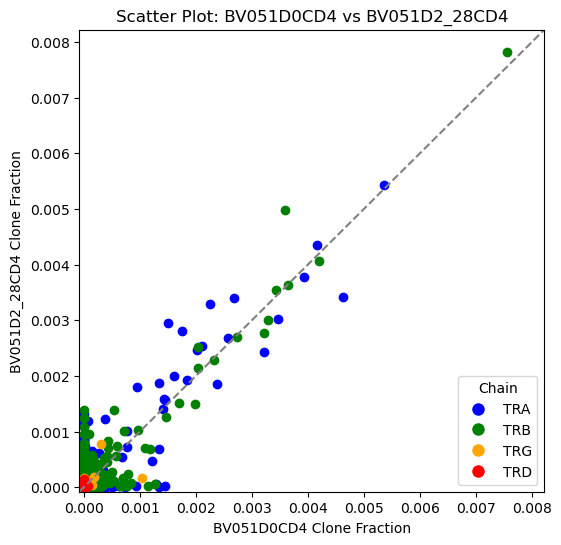

In [43]:
plot_diff('BV051',result_dict,chain='CD4')

In [44]:
result_dict['BV051D2_28CD4'].loc[result_dict['BV051D2_28CD4']['cloneFraction'] > 0.003]

v_call            junction_aa   j_call  cloneCount  cloneFraction  \
1011   TRBV20-1           CSAKMPNTEAFF  TRBJ1-1     12208.0       0.004072   
1706     TRAV21             CAVRGNKLVF   TRAJ47     11467.0       0.003775   
2882    TRAV8-1         CAVNAPGGRRALTF    TRAJ5     10552.0       0.003393   
3748   TRAV13-2           CAEGRANSKLTF   TRAJ56      9315.0       0.003016   
8121   TRAV12-1         CVVTRSGGYNKLIF    TRAJ4     16671.0       0.005429   
12476   TRBV4-2        CASSPTSGSTDTQYF  TRBJ2-3     15231.0       0.004991   
12539  TRAV12-2           CAVKGGGFKTIF    TRAJ9     10239.0       0.003299   
20528   TRBV7-2        CASSLGSGLGYEQYF  TRBJ2-7     11102.0       0.003543   
35259     TRAV6          CAPLRDAGNMLTF   TRAJ39     13437.0       0.004346   
37966  TRAV12-2         CAADEGYGNNRLAF    TRAJ7     10814.0       0.003424   
40137  TRBV20-1  CSARDFSLRAGGPMSLDEQFF  TRBJ2-1     11014.0       0.003638   
43693    TRBV18            CASSDQETQYF  TRBJ2-5     24600.0       0.007830   

               Epitope     Score  
1011         NLVPMVATV  0.236062  
1706         NLVPMVATV  0.202224  
2882         GILGFVFTL  0.160906  
3748   CIPIPSSWAFAKYLW  0.157767  
8121         NLVPMVATV  0.100401  
12476      HTTDPSFLGRY  0.071381  
12539        VSDGGPNLY  0.071170  
20528         RAKFKQLL  0.041982  
35259             None  0.000000  
37966             None  0.000000  
40137             None  0.000000  
43693             None  0.000000

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


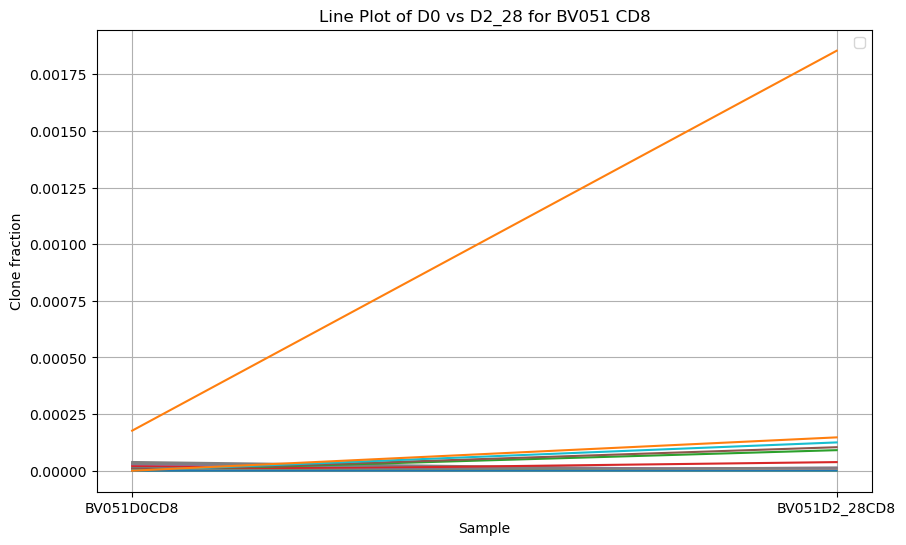

In [56]:
def plot_linediff(sample, data_frame, t1='D0', t2='D2_28', chain='CD8'):
    s1cd8 = sample + t1 + chain
    s2cd8 = sample + t2 + chain
    
    df1 = data_frame[s1cd8]
    df2 = data_frame[s2cd8]
    
    merged_df = pd.merge(df1, df2, on='junction_aa', how='outer', suffixes=('_df1', '_df2'))
    
    merged_df = merged_df.fillna(0)
    
    # Make line plot
    plt.figure(figsize=(10, 6))
    
    for index, row in merged_df.iterrows():
        plt.plot([s1cd8,s2cd8],[row['cloneFraction_df1'], row['cloneFraction_df2']])
    
    # Customize plot
    plt.xlabel('Sample')
    plt.ylabel('Clone fraction')
    plt.title(f'Line Plot of {t1} vs {t2} for {sample} {chain}')
    plt.legend()
    plt.grid(True)
    
    # Show the plot
    plt.show()
    
plot_linediff('BV051',cov_results)

In [53]:
cov_results['BV051D2_28CD8']

v_call        junction_aa   j_call  cloneCount  cloneFraction  \
63     TRAV19     CALSEADFGNVLHC   TRAJ35      3945.0   1.854333e-03   
66     TRAV17      CATDA*GYQKVTF   TRAJ13         1.0   4.323861e-07   
67     TRAV19   CALSEAGGGSNYKLTF   TRAJ53        24.0   1.037727e-05   
96    TRBV5-1    CASSWGTGVDQPQHF  TRBJ1-5        15.0   6.485791e-06   
130   TRBV4-1    CASSQEWGNLYEQYF  TRBJ2-7       210.0   9.080107e-05   
187   TRBV5-5  CASSLRPVSSYNSPLHF  TRBJ1-6        88.0   3.804997e-05   
194    TRAV25     CAGKPKASYDKVIF   TRAJ50        28.0   1.320252e-05   
207    TRBV28    CASSLRQGVYQPQHF  TRBJ1-5       240.0   1.037727e-04   
255   TRBV5-1    CASSLSQGALDEQYF  TRBJ2-7         5.0   2.161930e-06   
256    TRAV19     CALSESRFGNVLHC   TRAJ35        29.0   1.367403e-05   
258    TRAV19     CALGEADFGNVLHC   TRAJ35         1.0   4.323861e-07   
267    TRAV17      CATDEWGYQKVTF   TRAJ13       289.0   1.249596e-04   
270   TRBV6-4      CASSDS_RGEQYF  TRBJ2-7         1.0   4.323861e-07   
384  TRBV24-1      CATSDFRTGEQFF  TRBJ2-1       291.0   1.472708e-04   

        Epitope     Score  
63    NQKLIANQF  0.355481  
66    VFLVLLPLV  0.355056  
67    LPDDFTGCV  0.355056  
96    TPINLVRDL  0.324935  
130  SEPVLKGVKL  0.281647  
187  KLPDDFTGCV  0.244551  
194  RLITGRLQSL  0.243196  
207  KLPDDFTGCV  0.241412  
255   NQKLIANQF  0.236988  
256   NQKLIANQF  0.236988  
258   NQKLIANQF  0.236988  
267   VFLVLLPLV  0.236704  
270   NLDESLIDL  0.236704  
384  KLPDDFTGCV  0.234706

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


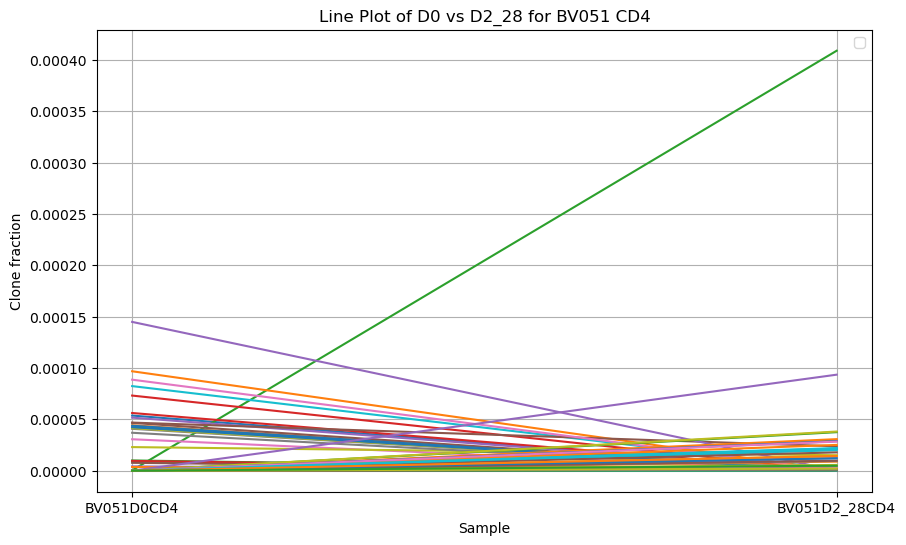

In [57]:
plot_linediff('BV051',cov_results,chain='CD4')

In [58]:
cov_results['BV051D2_28CD4']

v_call        junction_aa   j_call  cloneCount  cloneFraction  \
52    TRBV20-1     CSARDNRAHTEAFF  TRBJ1-1        13.0   4.611082e-06   
86      TRAV19     CALSEADFGNVLHC   TRAJ35      1169.0   4.088379e-04   
88      TRAV19   CALSEAGGGSNYKLTF   TRAJ53        19.0   5.615279e-06   
176   TRBV24-1     CATSDPTGENEQFF  TRBJ2-1        57.0   1.994805e-05   
275     TRBV27   CASRPLAGLSTDTQYF  TRBJ2-3         1.0   3.499658e-07   
279   TRBV20-1      CSARTGLTGELFF  TRBJ2-2        27.0   8.855137e-06   
280   TRBV12-3     CASSYGAAKETQYF  TRBJ2-5       127.0   3.753371e-05   
301   TRAV12-1    CVVNGLEDSNYQLIW   TRAJ33        51.0   1.507259e-05   
307   TRAV13-2       CAETPTGNQFYF   TRAJ49         4.0   1.418794e-06   
393   TRBV29-1   CSVEDWAGGSYNEQFF  TRBJ2-1         2.0   7.093972e-07   
469   TRBV24-1     CATQRTRNTGELFF  TRBJ2-2         1.0   3.499658e-07   
470      TRBV2   CASSEALGRVIETQYF  TRBJ2-5         6.0   2.099795e-06   
471      TRBV9   CASSVALRMGAGELFF  TRBJ2-2        82.0   2.908529e-05   
472    TRBV7-2   CASSLIGRQGYNEQFF  TRBJ2-1        99.0   2.925856e-05   
473   TRBV20-1      CSASTGPLYEQYF  TRBJ2-7        40.0   1.418794e-05   
474   TRBV20-1     CSARDNRAHTEAFL  TRBJ1-1         1.0   3.546986e-07   
548   TRBV29-1       CSVAPSYNEQFF  TRBJ2-1        73.0   2.157449e-05   
550     TRBV19     CASSINRGLGGYTF  TRBJ1-2       104.0   3.073627e-05   
680   TRBV20-1      CSAGRGTNYGYTF  TRBJ1-2         3.0   1.049897e-06   
682   TRAV26-2  CILRDPGSGGSNYKLTF   TRAJ53         3.0   1.064096e-06   
687   TRBV20-1      CSARALAGAEQYF  TRBJ2-7       295.0   9.349788e-05   
693   TRAV12-1     CVVNKRNNNARLMF   TRAJ31        67.0   2.376481e-05   
700     TRAV17     CATDEKGNTDKLIF   TRAJ34        51.0   1.785300e-05   
702     TRAV21  CAVDSPHSGAGSYQLTF   TRAJ28         8.0   2.364328e-06   
705     TRAV17      CATDIWGYQKVTF   TRAJ13        27.0   9.449077e-06   
706   TRBV20-1    CSARDTTFSTDTQYF  TRBJ2-3       109.0   3.814627e-05   
711   TRAV12-1    CVVNMFGNSGYALNF   TRAJ41        71.0   2.098341e-05   
729     TRBV15      CATSRERSPEAFF  TRBJ1-1        81.0   2.873059e-05   
739     TRAV17     CATVTLYNTDKLIF   TRAJ34        85.0   2.512099e-05   
741     TRAV19   CALSEAGGGSNYKPSF   TRAJ53         1.0   2.955410e-07   
1178  TRBV29-1      CSVGAALNTEAFF  TRBJ1-1         4.0   1.418794e-06   
1181  TRBV24-1      CATSDWMGETQYF  TRBJ2-5        35.0   1.224880e-05   
1187   TRBV7-8   CASSAYAGVDYNEQFF  TRBJ2-1        33.0   9.752854e-06   
1207  TRBV10-3     CAISSDSNNSPLHF  TRBJ1-6        81.0   2.834723e-05   
1208  TRBV29-1     CSVEKRG_YNEQFF  TRBJ2-1         3.0   1.049897e-06   
1212  TRBV29-1      CGVRTGGNTEAFF  TRBJ1-1         7.0   2.068787e-06   
1216  TRBV29-1       CSVGEQSYEQYF  TRBJ2-7        63.0   2.204785e-05   
1219  TRBV29-1   CSVDGTSGRNYNEQFF  TRBJ2-1        34.0   1.205975e-05   
1225   TRBV6-5      CASSYSTLGRQYF  TRBJ2-3        41.0   1.434860e-05   
1238  TRBV29-1      CSVEVGSSGELFF  TRBJ2-2        14.0   4.899521e-06   

                   Epitope     Score  
52    RFASVYAWNRKRISNCVADY  0.362169  
86               NQKLIANQF  0.355481  
88               LPDDFTGCV  0.355056  
176             KLPDDFTGCV  0.352059  
275              YFPLQSYGF  0.281647  
279              KEIDRLNEV  0.281647  
280             KLPDDFTGCV  0.281647  
301              NYNYLYRLF  0.276645  
307              RLQSLQTYV  0.272704  
393              TPINLVRDL  0.252299  
469   RFASVYAWNRKRISNCVADY  0.241446  
470   RFASVYAWNRKRISNCVADY  0.241446  
471   RFASVYAWNRKRISNCVADY  0.241446  
472   RFASVYAWNRKRISNCVADY  0.241446  
473   RFASVYAWNRKRISNCVADY  0.241446  
474   RFASVYAWNRKRISNCVADY  0.241446  
548              KCYGVSPTK  0.239515  
550              KCYGVSPTK  0.239515  
680              NQKLIANQF  0.236988  
682              AEVQIDRLI  0.236988  
687              LTDEMIAQY  0.236988  
693              NYNYLYRLF  0.236988  
700              RLDKVEAEV  0.236704  
702              LPDDFMGCV  0.236704  
705              VFLVLLPLV  0.236704  


In [59]:
cov_results['BV051D0CD4']

v_call        junction_aa   j_call  cloneCount  cloneFraction  \
18    TRBV4-2  CASSQDRPSSYNSPLHF  TRBJ1-6       149.0   5.369793e-05   
37   TRBV20-1    CSARGDRGEPYEQYF  TRBJ2-7       115.0   4.426237e-05   
57     TRAV19     CALSEADFGNVLHC   TRAJ35         1.0   3.603888e-07   
61     TRAV19   CALSEADGGSNYKLTF   TRAJ53       146.0   5.619396e-05   
62   TRBV24-1    CATSDVAGGGWEQFF  TRBJ2-1        11.0   4.233792e-06   
114  TRBV29-1      CSVEVGVDGELFF  TRBJ2-2       121.0   4.657171e-05   
199  TRBV25-1       CASRGNNYEQYF  TRBJ2-7        85.0   3.063305e-05   
202  TRBV20-1      CSARVTLTYEQYF  TRBJ2-7       106.0   4.079835e-05   
222  TRAV12-1    CVVNGLEDSNYQLIW   TRAJ33        64.0   2.300260e-05   
228  TRAV13-2       CAETPTGNQFYF   TRAJ49       214.0   8.236649e-05   
300  TRBV29-1      CSVGQGNSYEQYF  TRBJ2-7       133.0   4.378994e-05   
347  TRBV20-1      CSALGGGGNEQFF  TRBJ2-1       279.0   9.681154e-05   
416   TRAV9-2    CALSDRWGGSEKLVF   TRAJ57        28.0   9.218936e-06   
472  TRBV29-1     CSVELFSGANVLTF  TRBJ2-6       203.0   7.315893e-05   
532  TRBV20-1      CSARALEGGEQYF  TRBJ2-7       157.0   5.169189e-05   
537  TRAV12-1     CVVNKRNNNARLMF   TRAJ31       130.0   4.685054e-05   
540    TRAV19     CALSEIGFGNALHC   TRAJ35         2.0   6.584954e-07   
541    TRAV19     CALSEPSFGNVLHC   TRAJ35        96.0   3.694945e-05   
548  TRBV20-1    CSARDTSASTDTQYF  TRBJ2-3       126.0   4.148521e-05   
549  TRBV20-1    CSARDGRASTDTQYF  TRBJ2-3         1.0   3.848901e-07   
553  TRBV20-1    CSARDATSSTDTQYF  TRBJ2-3       110.0   4.233792e-05   
554    TRAV41     CAVGW*RSQGNLIF   TRAJ42        10.0   3.603888e-06   
576  TRBV20-1      CSARVPIAYEQYF  TRBJ2-7        26.0   1.000714e-05   
887  TRBV29-1     CSVESGTRTDTQYF  TRBJ2-3        29.0   9.548183e-06   
905  TRBV29-1     CSVLSAGGPDTQYF  TRBJ2-3       440.0   1.448690e-04   
908  TRBV24-1    CATSDRDRPHQPQHF  TRBJ1-5        20.0   7.697803e-06   
916  TRBV29-1   CSVGGLGGRSYNEQFF  TRBJ2-1       260.0   8.862509e-05   

        Epitope     Score  
18   KLPDDFTGCV  0.385958  
37    LTDEMIAQY  0.358687  
57    NQKLIANQF  0.355481  
61    LPDDFTGCV  0.355056  
62    SVTTEILPV  0.355056  
114   NLNESLIDL  0.352059  
199  KLPDDFTGCV  0.281647  
202   YFPLQSYGF  0.281647  
222   NYNYLYRLF  0.276645  
228   RLQSLQTYV  0.272704  
300   LTDEMIAQY  0.249994  
347  QYIKWPWYIW  0.242380  
416   LTDEMIAQY  0.239588  
472   KQIYKTPPI  0.237601  
532   LTDEMIAQY  0.236988  
537   NYNYLYRLF  0.236988  
540   NQKLIANQF  0.236988  
541   NQKLIANQF  0.236988  
548   HLMSFPQSA  0.236704  
549   HLMSFPQSA  0.236704  
553   HLMSFPQSA  0.236704  
554   SIIAYTMSL  0.236704  
576   FIAGLIAIV  0.236704  
887   TPINLVRDL  0.234706  
905   FIAGLIAIV  0.234706  
908   YFPLQSYGF  0.234706  
916   TPINLVRDL  0.234706

In [72]:
humanepitopes = list(epirepo.loc[epirepo['origin'] == "Homo sapiens"]["epitope"])
humanepitopes = [x for x in humanepitopes if ':' not in x]
humanepitopes

['AAGIGILTV',
 'AAKMYAFTL',
 'AALQRLAAV',
 'AALQRLAAVL',
 'AGASSIWYR',
 'ALAGIGILTV',
 'ALDIEIATY',
 'ALGDLFQSI',
 'ALGIGILTV',
 'ALHGGWTTK',
 'ALIHHNTHL',
 'ALLETLSLL',
 'ALLETLSLLL',
 'ALQRLAAV',
 'ALSPVIPLI',
 'ALSYTPVEV',
 'ALTAVAEEV',
 'ALVGAIPSI',
 'ALWGPDPAA',
 'ALWGPDPAAA',
 'ALWGPDPAAAF',
 'ALWMRLLPL',
 'ALWMRLLPLL',
 'ALYGSVPVL',
 'AMAGSPVFL',
 'AMFWSVPTV',
 'AMLGTHTMEV',
 'AMMIARFKMF',
 'APRGPHGGAASGL',
 'APSVWRSSL',
 'AVGSHVYSV',
 'AVQWLRPK',
 'CGMDKFSI',
 'CGMDKFSITL',
 'CGSHLVEALY',
 'CLASLHPR',
 'CLELAEYLY',
 'CLGHNHKEV',
 'CPRERPEEL',
 'CPSVWRSSL',
 'CPTYNEVHL',
 'CTSICSLY',
 'CYRGRSCPI',
 'DKERLAAL',
 'DLERKIESL',
 'DLTSFLLSL',
 'DPPALASTNAEVT',
 'DYRRQLQSL',
 'EAAGIGILTV',
 'EAFHQSCFR',
 'EAKQKGFVPF',
 'EEAAGIGIL',
 'EFTVSGNIL',
 'EGHLKRNIV',
 'EHEGSGPEL',
 'EILGALLSI',
 'EIRTQYEAM',
 'ELAEYLYNI',
 'ELLVRINRL',
 'ELPARTSPM',
 'ELRELRLRL',
 'ELRLRLDQL',
 'EPQNFIDSLI',
 'EPSDVTETL',
 'EPSVWRSSL',
 'ERMSRLSKV',
 'ESITGSLGPLL',
 'EVDPIGHLY',
 'EVIVPLSGW',
 'EVKEKGMAA',
 '

In [73]:
human_results = dict()
for sample,df in result_dict.items():
    human_results[sample] = df.loc[(df["Epitope"].isin(humanepitopes)) & (df["Score"] > 0.23)]

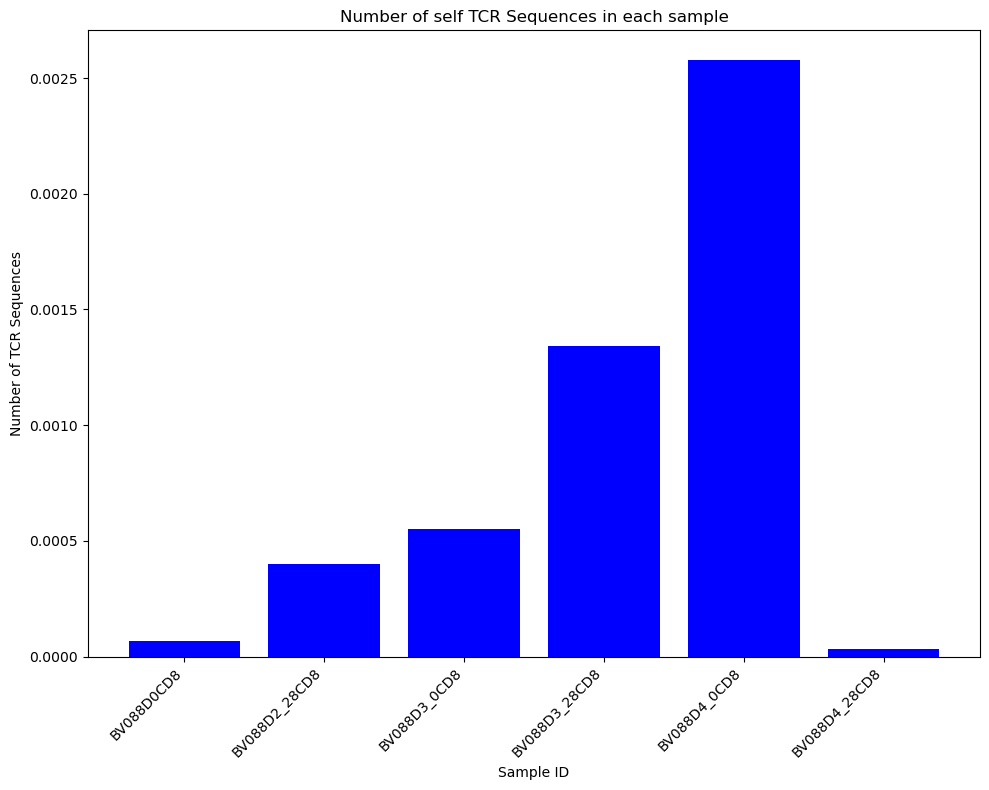

In [77]:
def plot_human(data_frames):
    # Create a bar graph showing the number of rows for each DataFrame
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # Extract TCR sequences count and file names
    sample_ids = list(data_frames.keys())
    row_counts = [len(df) for df in data_frames.values()]

    # Sort sample IDs based on CD4 and CD8
    sorted_sample_ids_cd4 = sorted([id for id in sample_ids if id.endswith('CD4')])
    sorted_sample_ids_cd8 = sorted([id for id in sample_ids if id.endswith('CD8')])
    sorted_sample_ids = sorted_sample_ids_cd4 + sorted_sample_ids_cd8

    # Extract all unique TCR chains across all samples
    all_tcr_chains = set(chain for df in data_frames.values() for chain in df['v_call'].str[:3].unique())

    # Initialize bottom values for stacking
    bottom = [0] * len(sorted_sample_ids)

    # Plotting for all samples
    for sample_id in sorted_sample_ids:

        #Spike
        count = np.sum(data_frames[sample_id]["cloneFraction"])
        ax.bar(sample_id, count, color='blue', bottom=bottom[sorted_sample_ids.index(sample_id)])
        bottom[sorted_sample_ids.index(sample_id)] += count
        


    # Set x-tick positions and labels
    ax.set_xticks(range(len(sorted_sample_ids)))
    ax.set_xticklabels(sorted_sample_ids, rotation=45, ha='right')

    ax.set_xlabel('Sample ID')
    ax.set_ylabel('Number of TCR Sequences')
    ax.set_title('Number of self TCR Sequences in each sample')

    # Show the plot
    plt.tight_layout()
    plt.show()
    
plot_human({key: value for key, value in human_results.items() if 'BV088' in key and 'CD8' in key})

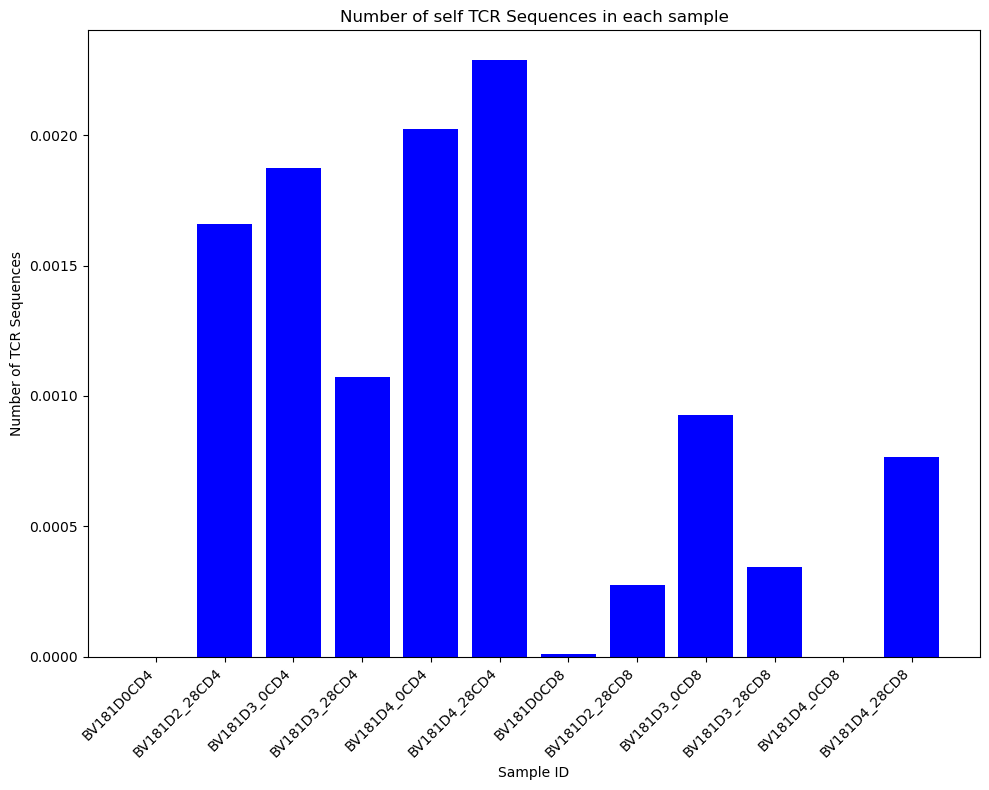

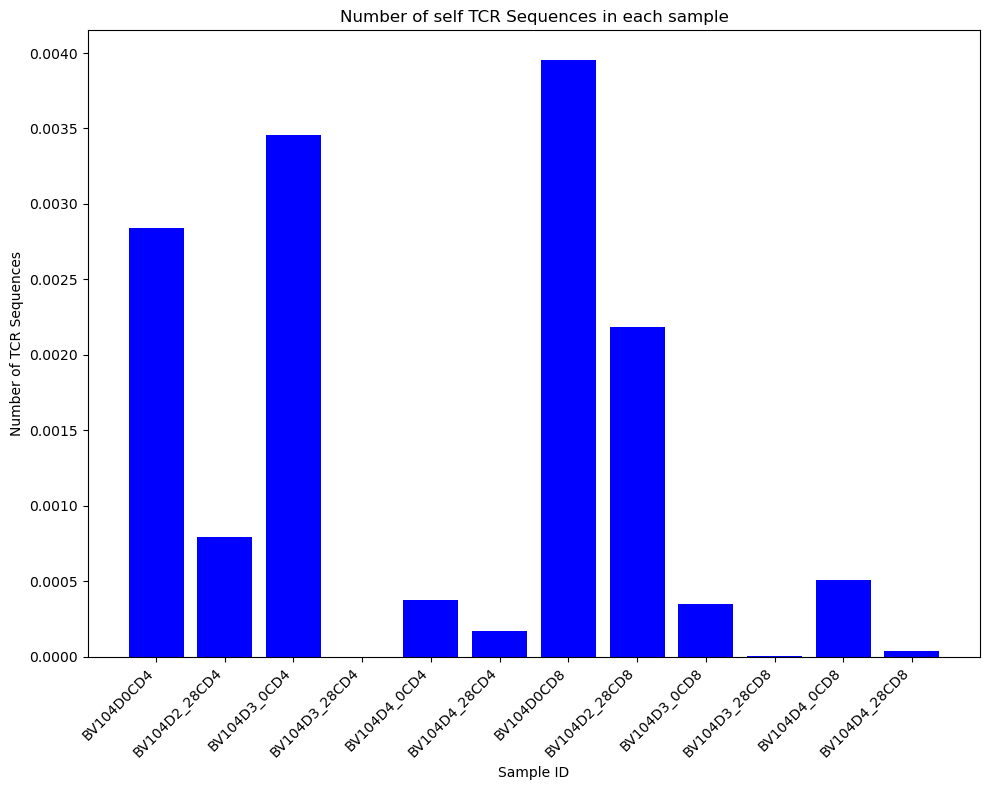

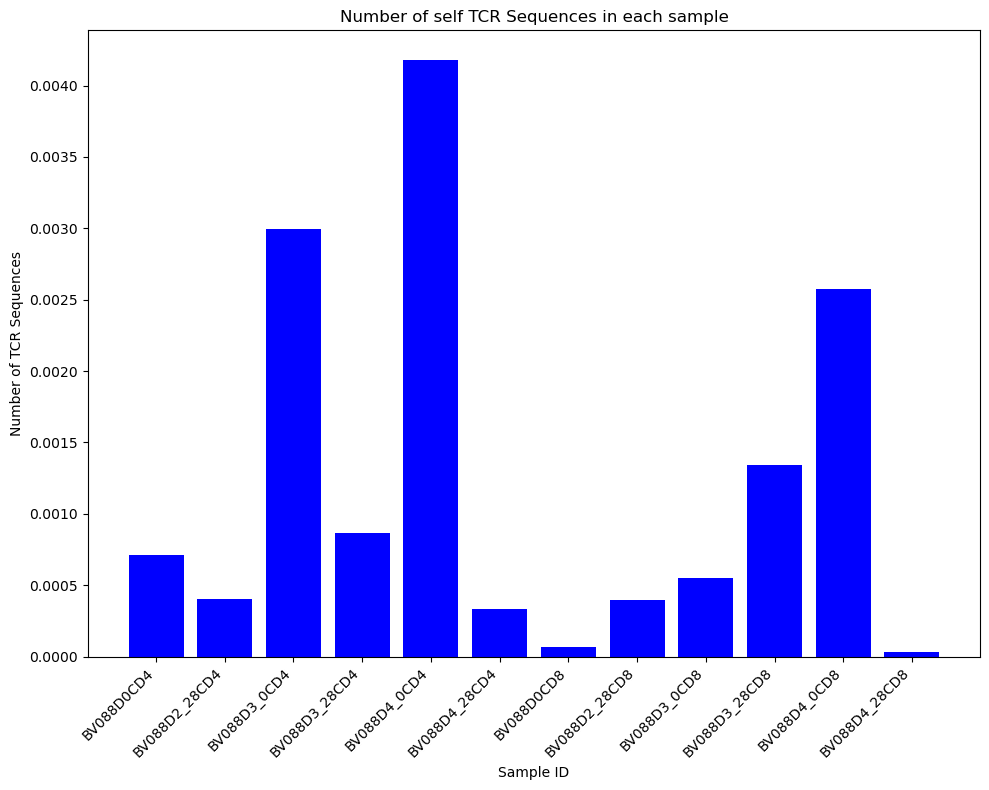

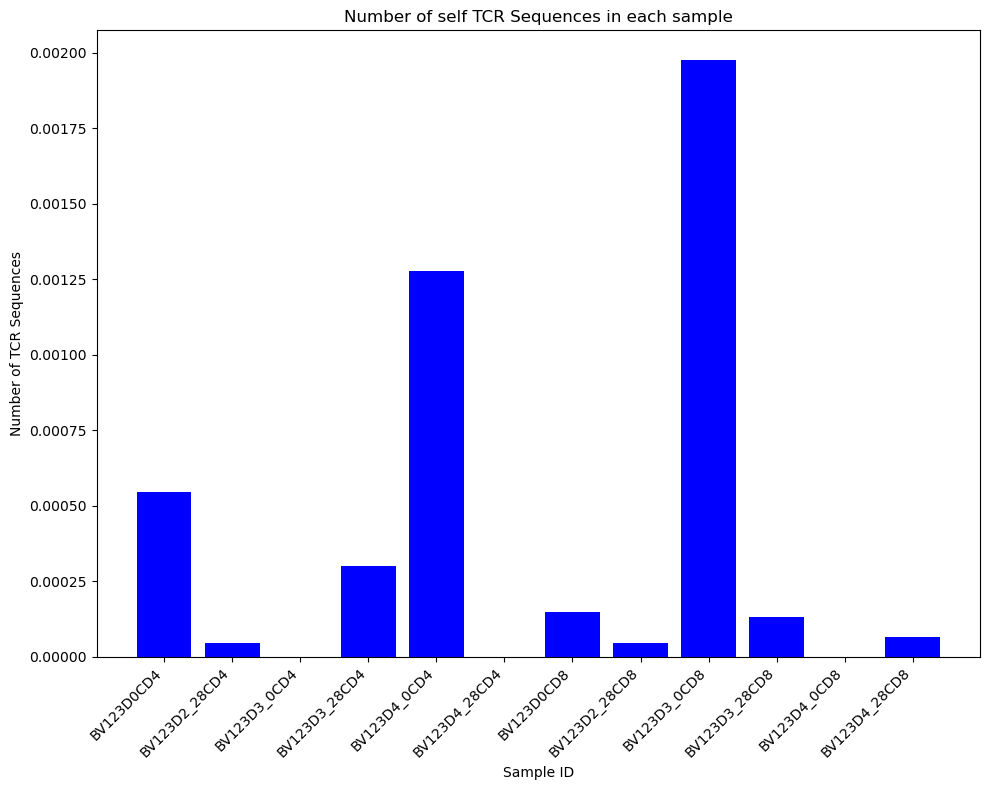

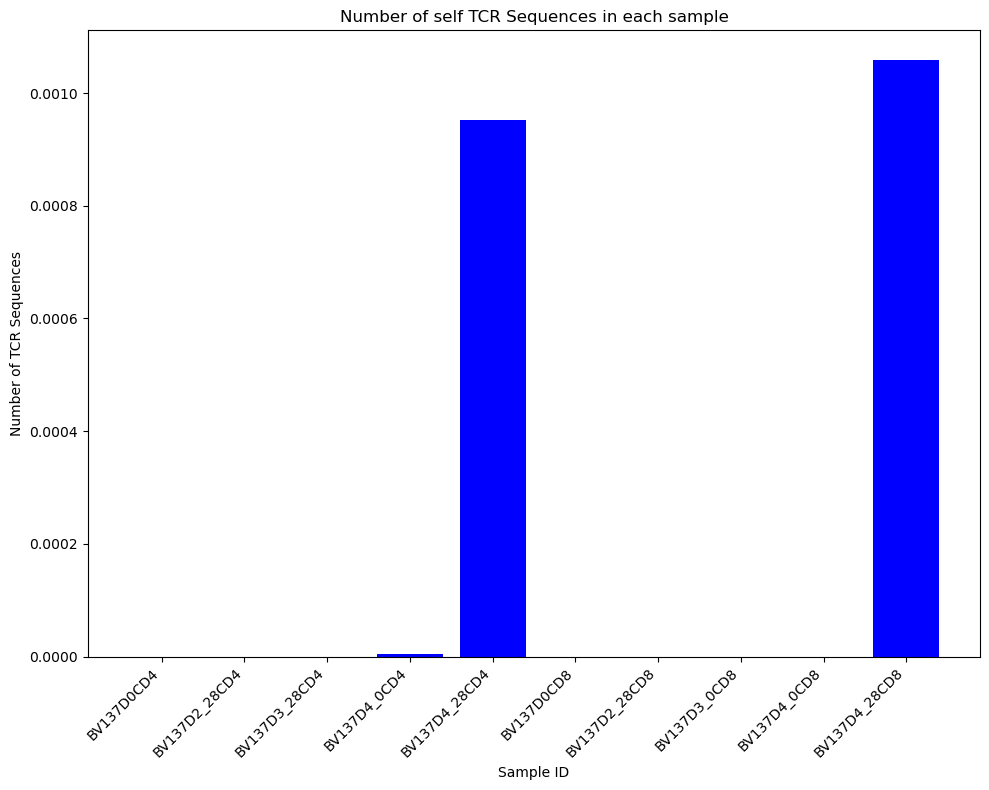

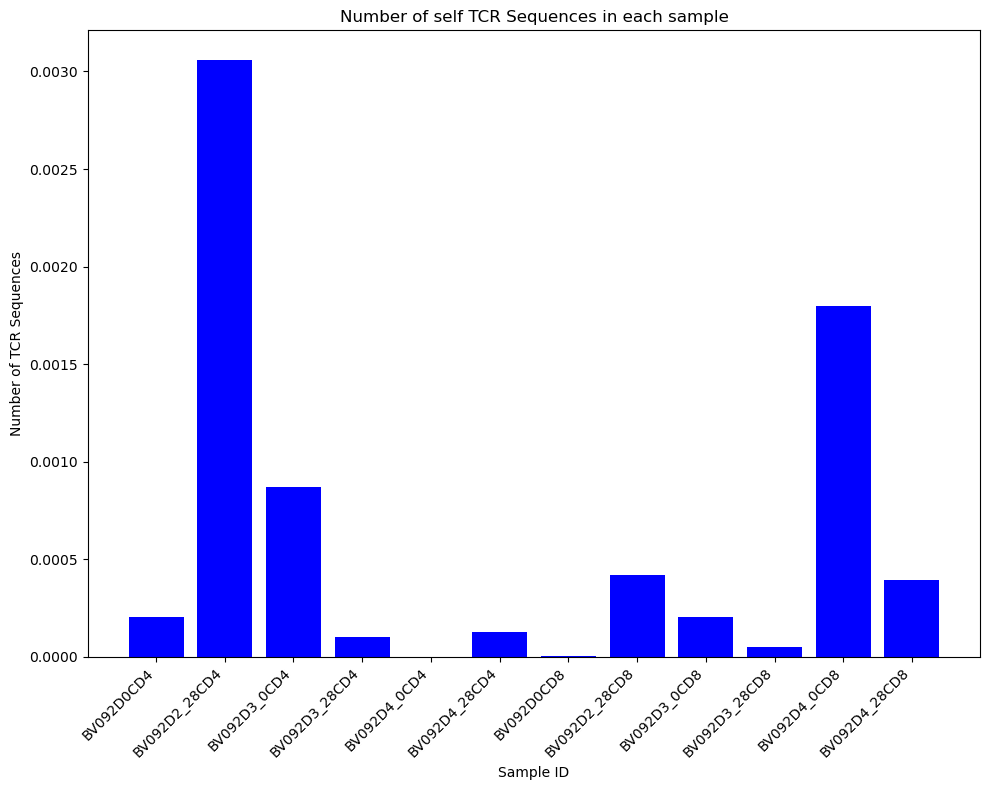

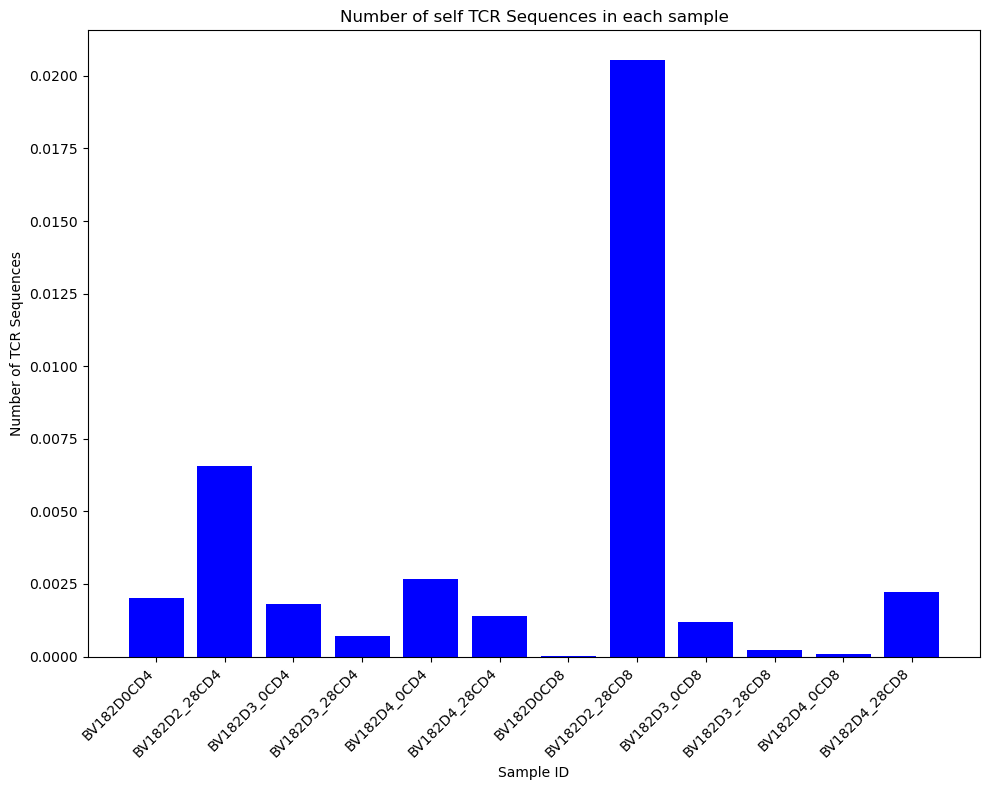

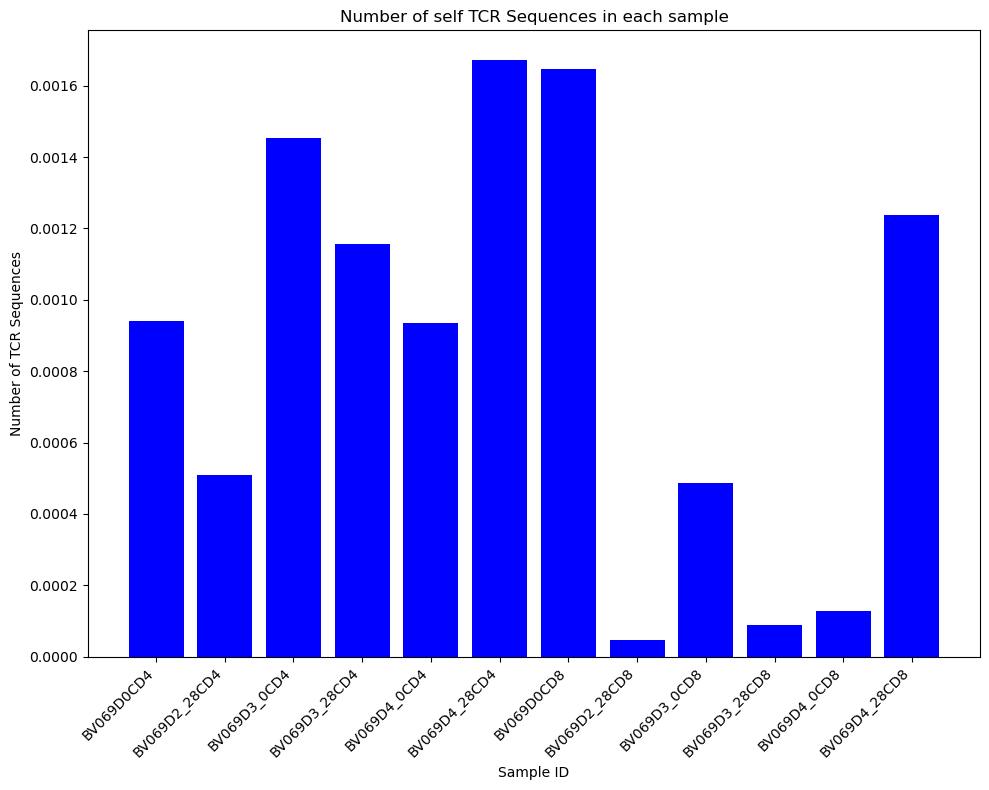

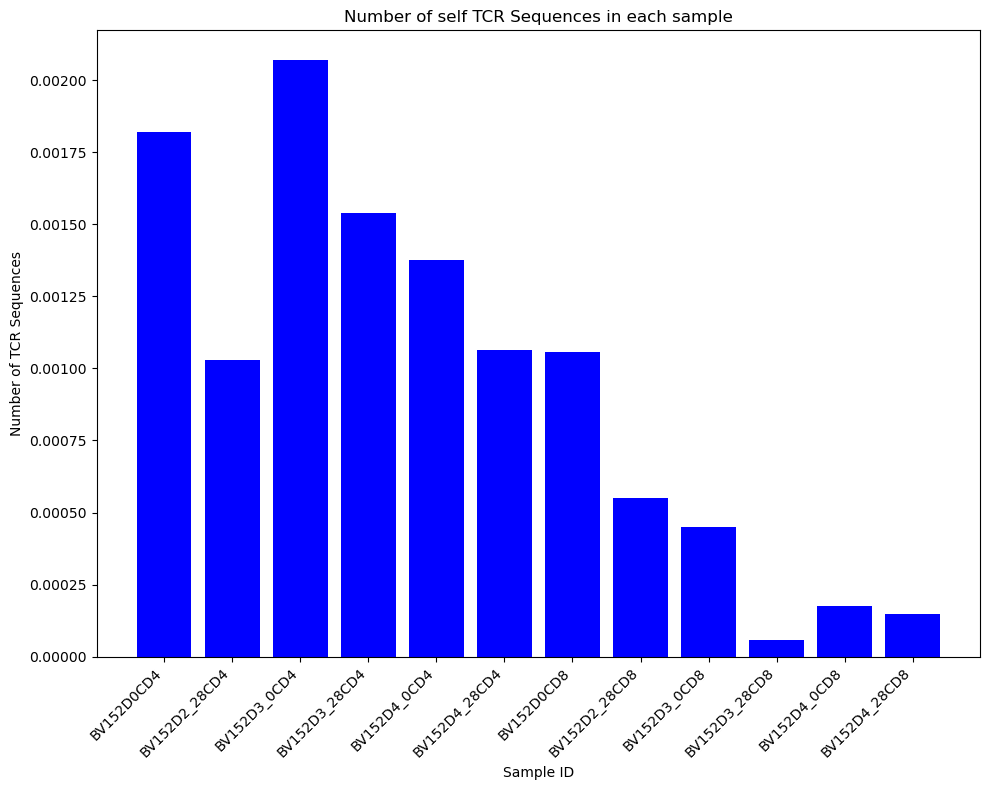

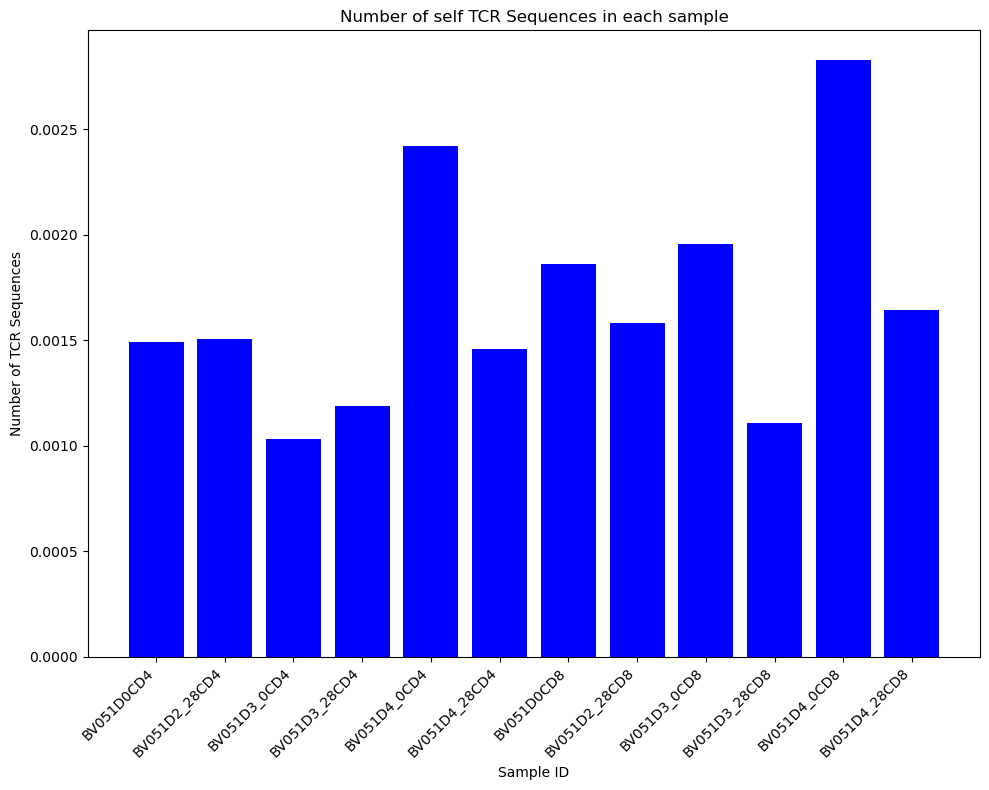

In [76]:
for sample in samples:
    plot_human({key: value for key, value in human_results.items() if sample in key})

In [78]:
human_results['BV088D0CD8']

v_call     junction_aa  j_call  cloneCount  cloneFraction     Epitope  \
64    TRAV19   CALSEANGQKLLF  TRAJ16         1.0       0.000002   VTDAAHLLI   
81  TRAV12-2  CAVNPNSGNTPLVF  TRAJ29        11.0       0.000066  ALAGIGILTV   

       Score  
64  0.246789  
81  0.238183